<a href="https://colab.research.google.com/github/jcardonamde/reto_cobranzas_sector_financiero/blob/main/cobranzas_sector_financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO TECNOLÓGICO DATA SCIENCE NIVEL BÁSICO <br/>TALENTO ESPECIALIZADO SAPIENCIA – COHORTE 4**


## Proyecto Cobranza en sector financiero

<br>

**Descripción:**

El caso de uso de sector financiero expone un proceso de cobranza a clientes que actualmente se encuentran en mora (*no pago*) de su obligación financiera (*crédito*). Allí se registra en cada fila la gestión desarrollada por el abogado y el resultado de la gestión. Es importante analizar las causales principales de incumplimiento y definir estrategias de recuperación de la cartera con base en los perfiles de cliente identificados.

<br>
<br>

**Objetivo:**

Demostrar conocimientos y habilidades como científico de datos, identificando y analizando los patrones en los datos para, a partir de estos, construir modelos descriptivos y predictivos que apoyen la toma de decisiones con base en los datos, con el fin de lograr los objetivos de negocio corporativos y llevar la estrategia hacia una compañía data-driven.

<br>

* **Diccionario de los datos:**

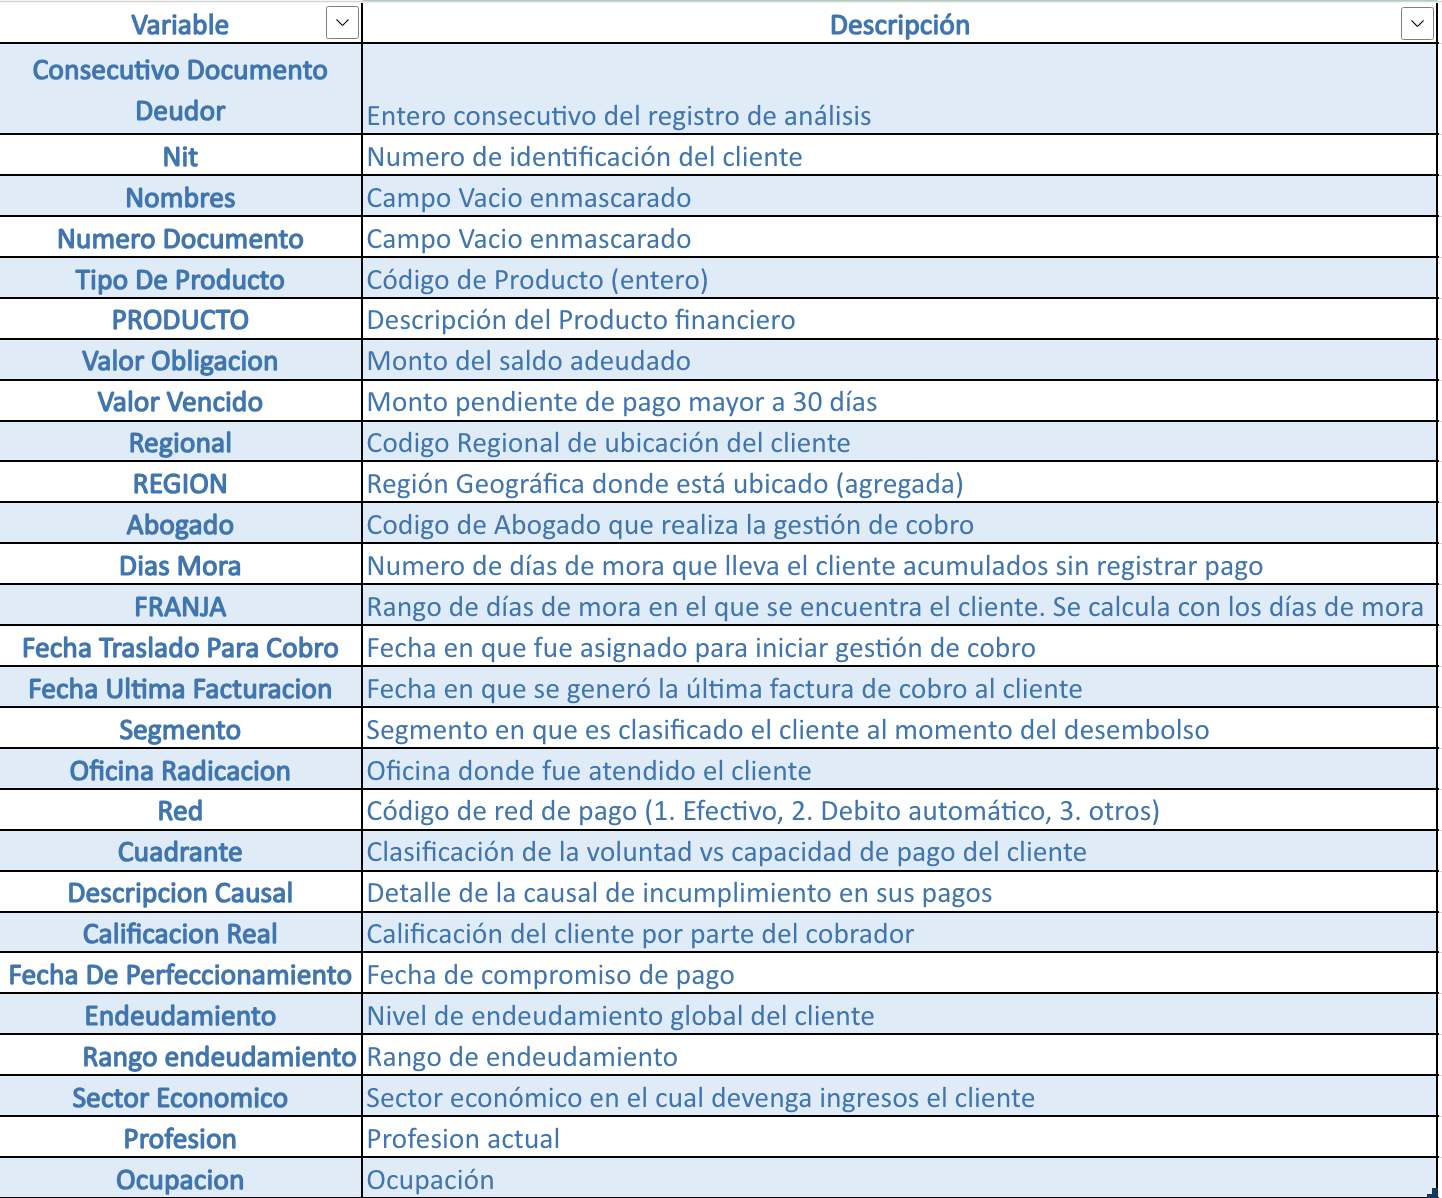



## 📌 Limpieza de los datos

Importar libreria y dataset


In [ ]:
# Habilito la opción de poder cargar los datos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos libreria y ruta del dataset
import pandas as pd
filename = '/content/drive/MyDrive/Reto DS Eafit/Caso 01 - Cobranza Sector Financiero.xlsx'
data = pd.read_excel(filename)
data.head()

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,27314049,6408,NaN,NaN,3,TARJETAS DE CREDITO,1675782.0,451144.0,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,1,2005-11-25,3051820.0,2015-01-01 00:00:00,NaN,ABOGADO,JUBILADO
1,19894495,38856,NaN,NaN,16,VEHICULOS SUFI,13833384.0,1357457.0,2099,BOGOTA,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,2011-10-31,13833384.0,2015-01-01 00:00:00,NaN,ABOGADO,INDEPENDIENTE
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,25245616,110055,NaN,NaN,16,VEHICULOS SUFI,27960592.0,3593669.0,2099,BOGOTA,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,2013-07-10,27960592.0,15-50,NaN,ABOGADO,INDEPENDIENTE
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


In [ ]:
# Inicialmente identifico la forma del set de datos
data.shape

(89247, 27)

Con lo anterior puedo entender que este set de datos se compone de 27 columnas y 89.247 filas

In [ ]:
# Igualmente, examino el número de valores únicos entre las columnas con las cuales estamos trabajando
data.nunique()

Consecutivo Documento Deudor    89247
Nit                             74657
Nombres                             0
Numero Documento                    0
Tipo De Producto                   23
PRODUCTO                            6
Valor Obligacion                88515
Valor Vencido                   84205
Regional                           33
REGION                              5
Abogado                             4
Dias Mora                         571
FRANJA                              6
Fecha Traslado Para Cobro         257
Fecha Ultima Facturacion          201
Segmento                            4
Oficina Radicacion                672
Red                                 3
Cuadrante                           6
Descripcion Causal                 53
Calificacion Real                   4
Fecha De Perfeccionamiento       4368
Endeudamiento                   74331
Rango endeudamiento                 6
Sector Economico                   22
Profesion                          85
Ocupacion   

Aquí podemos identificar particularmente de que las columnas de Nombres y Número Documento no tienen ningún dato único. Esto lo que nos da a entender es que tengamos datos faltantes allí.

Posteriormente, voy a identificar los tipos de datos que componen cada columna al igual confirmar de si se tienen valores faltantes.

In [ ]:
# Reviso el número y tipo de dato por Columna, al igual que los datos faltantes que se tengan
print(data.info(), '\n')
print(data.isna().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89247 entries, 0 to 89246
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Consecutivo Documento Deudor  89247 non-null  int64         
 1   Nit                           89247 non-null  int64         
 2   Nombres                       0 non-null      float64       
 3   Numero Documento              0 non-null      float64       
 4   Tipo De Producto              89247 non-null  int64         
 5   PRODUCTO                      89247 non-null  object        
 6   Valor Obligacion              89247 non-null  float64       
 7   Valor Vencido                 89247 non-null  float64       
 8   Regional                      89247 non-null  int64         
 9   REGION                        89247 non-null  object        
 10  Abogado                       89247 non-null  int64         
 11  Dias Mora                   

<Axes: >

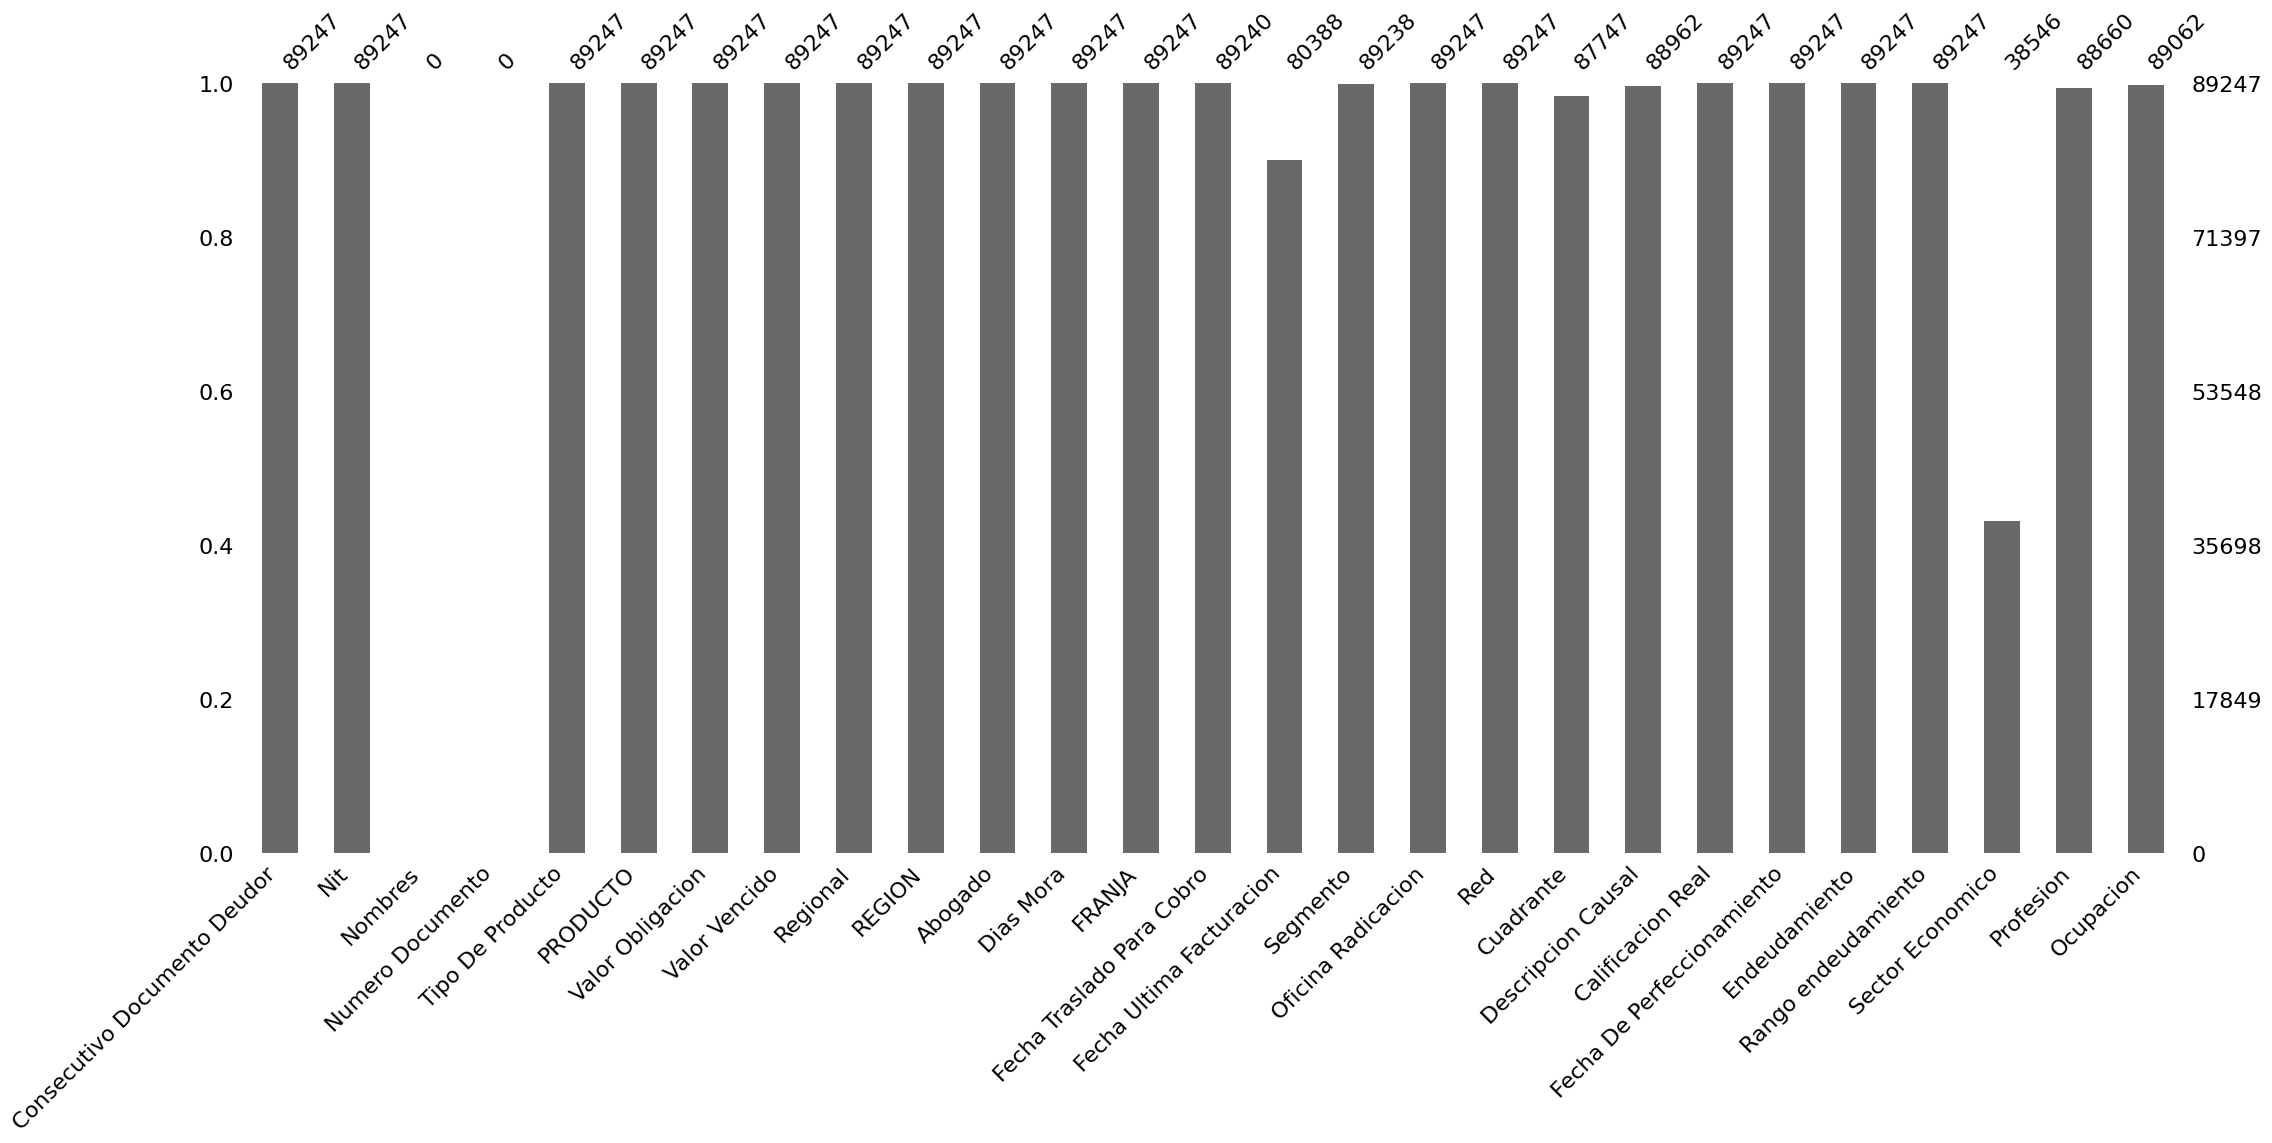

In [ ]:
# Aplico una visualización de dichos datos nulos por columna apoyandome en la libreria missingno
import missingno as msno
msno.bar(data)

Podemos ver que las columnas que tienen datos faltantes son:

*   Nombres
*   Numero Documento
*   Fecha Traslado Para Cobro
*   Fecha Ultima Facturacion
*   Segmento
*   Cuadrante
*   Descripcion Causal
*   Sector Economico
*   Profesion
*   Ocupacion

En este punto puedo inferir que tanto la columna de Nombres y Número Documento no manejan datos por protección de la identidad de los clientes. Por lo que para nuestro análisis no serían necesarias, por lo que las depurare más adelante.

Las demás columnas las analizaré más a fondo para conocer que tanta inherencia relevante tienen en el data set y definir si debería hacer un rellenado de data o finalmente eliminarlas.


In [ ]:
print(data.dtypes)

Consecutivo Documento Deudor             int64
Nit                                      int64
Nombres                                float64
Numero Documento                       float64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  object
Abogado                                  int64
Dias Mora                                int64
FRANJA                                  object
Fecha Traslado Para Cobro       datetime64[ns]
Fecha Ultima Facturacion                object
Segmento                                object
Oficina Radicacion                       int64
Red                                      int64
Cuadrante                               object
Descripcion Causal                      object
Calificacion Real                        int64
Fecha De Perf

Aquí puedo identificar que tenemos diferentes tipos de datos, como lo son de tipo numérico (int64, float64), de formato fecha (datetime64) y de tipo objeto.

Esto también se debe tener en cuenta para saber si tenemos que darles un manejo especial para conocer los posibles causales de no pago y tambien para la posterior aplicación de modelos.

In [ ]:
# Identifico cuál es la cantidad de datos duplicados y en caso de existir poderlos depurar
data.duplicated()
data.duplicated().sum()

0

Luego del uso del anterior método vemos que está perfecto, ya que al momento no contamos con datos duplicados por depurar. Ahora corregiremos un pequeño detalle en el nombre de las columnas.

In [ ]:
# Validar el nombramiento de las columnas
data.columns

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'PRODUCTO', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'REGION', 'Abogado', 'Dias Mora', 'FRANJA',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')

Como se puede ver tenemos 3 columnas que estan bajo un formato UPPERCASE diferente al que manejamos en el resto de columnas que es de tipo Capitalize. Procedemos a corregirlo.

In [ ]:
# Se crea un diccionario de renombramiento
nuevos_nombres = {
    'PRODUCTO': 'Producto',
    'REGION': 'Region',
    'FRANJA': 'Franja'
}

# Se procede a renombrar las columnas
data.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
# Verificamos que el cambio haya quedado aplicado correctamente en las columnas
data.columns

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'Producto', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'Region', 'Abogado', 'Dias Mora', 'Franja',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')

En este punto vamos a agrupar en objetos diferentes las variables que son de tipo numérico y categóricas para diferenciarlas.



In [ ]:
# Determinar el tipo de datos de cada columna
data_types = data.dtypes

# Crear listas para variables continuas y categóricas
variables_continuas = []
variables_categoricas = []

# Identificando el tipo de cada variable y se clasifica en la lista correspondiente
for column, dtype in data_types.items():  # Usamos items() en lugar de iteritems()
    if dtype == 'object':
        variables_categoricas.append(column)
    else:
        variables_continuas.append(column)

# Se crean objetos para diferenciar las variables continuas y categóricas
df_variables_continuas = data[variables_continuas]
df_variables_categoricas = data[variables_categoricas]

print('Variables Continuas')
print(df_variables_continuas)
print('\n')
print('Variables Categoricas')
print(df_variables_categoricas)

Variables Continuas
       Consecutivo Documento Deudor     Nit  Nombres  Numero Documento  \
0                          27314049    6408      NaN               NaN   
1                          19894495   38856      NaN               NaN   
2                          13587837      23      NaN               NaN   
3                          25245616  110055      NaN               NaN   
4                           2712382      92      NaN               NaN   
...                             ...     ...      ...               ...   
89242                      24892452  787457      NaN               NaN   
89243                      24485118  787459      NaN               NaN   
89244                      27364653  787459      NaN               NaN   
89245                      28482366  787459      NaN               NaN   
89246                      27641335  787459      NaN               NaN   

       Tipo De Producto  Valor Obligacion  Valor Vencido  Regional  Abogado  \
0           


En los anteriores objetos, pudimos identificar particularmente que las variables numéricas, a pesar de tener números en algunas de sus columnas.

Tienen un tipo de comportamiento un poco diferente porque hacen referencia a que podrían requerir una correspondencia con una descripción para ser completamente categórica.

Por ello se decide generar un análisis de las variables numéricas más puras en sentido de que sean discretas o continuas. Para posterior hacer un análisis estadístico de las variables.

In [ ]:
# Importo una libreria para darle mejor formato a la tabla y nos permita una mejor intepretación
from google.colab import data_table
data_table.enable_dataframe_formatter()

variables_numericas = data[['Consecutivo Documento Deudor', 'Nit', 'Valor Obligacion', 'Valor Vencido', 'Dias Mora', 'Endeudamiento']]
variables_numericas.describe()

,Consecutivo Documento Deudor,Nit,Valor Obligacion,Valor Vencido,Dias Mora,Endeudamiento
count,8.924700e+04,89247.000000,8.924700e+04,8.924700e+04,89247.000000,8.924700e+04
mean,2.315528e+07,485493.689771,7.069210e+06,7.062807e+05,47.099320,1.432068e+07
std,7.479098e+06,271437.508819,1.519014e+07,1.878659e+06,70.105525,2.916728e+07
min,7.758000e+03,18.000000,1.804400e+04,2.001000e+04,1.000000,1.804400e+04
25%,2.206810e+07,198392.500000,7.655165e+05,1.042480e+05,26.000000,1.292230e+06
50%,2.578647e+07,563959.000000,1.927124e+06,2.419370e+05,30.000000,4.600062e+06
75%,2.827977e+07,740818.500000,5.812533e+06,6.112845e+05,46.000000,1.697418e+07
max,3.016075e+07,787459.000000,6.713357e+08,1.831087e+08,2175.000000,2.012549e+09


Con lo anterior podemos identificar que el promedio de valor de las obligaciones crediticias es de unos 7.069.209 aproximadamente. Tambien que el valor de promedio del valor vencido por obligación es de unos $ 706.280.

Al igual que forma interesante, podemos identificar que el valor mínimo de días en mora es de un día y que hay obligaciones hasta con 2175 días en mora como maximo, como también un promedio de 47 días en mora.

En estas variables numéricas también tuvimos las columnas de Consecutivo Documento Deudor y Nit. Estas no representan una relevancia en nuestro análisis, por lo que en el próximo paso procederemos a eliminarlas para ir reduciendo el data set a lo que nos interesa seguir explorando.

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento']

# Eliminar las columnas
data = data.drop(columnas_a_eliminar, axis=1)

In [ ]:
# Visualizamos el dataset con las primeras columnas depuradas
data_table.enable_dataframe_formatter()
data.head(5)

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,3,TARJETAS DE CREDITO,1675782.0,451144.0,2099,BOGOTA,109978,60,31-60,2015-05-24,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,1,2005-11-25,3051820.0,2015-01-01 00:00:00,NaN,ABOGADO,JUBILADO
1,16,VEHICULOS SUFI,13833384.0,1357457.0,2099,BOGOTA,109978,24,<30,2015-06-04,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,2011-10-31,13833384.0,2015-01-01 00:00:00,NaN,ABOGADO,INDEPENDIENTE
2,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,109978,60,31-60,2015-05-31,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,16,VEHICULOS SUFI,27960592.0,3593669.0,2099,BOGOTA,109976,105,91-120,2015-06-13,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,2013-07-10,27960592.0,15-50,NaN,ABOGADO,INDEPENDIENTE
4,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,109978,48,31-60,2015-05-29,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


Ahora vamos a tratar las columnas que ya conocemos con datos faltantes. Como ya se vio anteriormente, se depuraron las columnas con datos faltantes como lo eran Nombres y Número Documento, ya que para el análisis nos eran necesarios.


Podemos tener presente que las columnas que aún tienen datos faltantes son:

* Fecha Traslado Para Cobro
* Fecha Ultima Facturacion
* Segmento
* Cuadrante
* Descripcion Causal
* Sector Economico
* Profesion
* Ocupacion

Procedemos a darles tratamiento:


In [ ]:
# Analizamos los datos faltantes para la columna Fecha Traslado Para Cobro
datos_faltantes_fecha_traslado_cobro = data['Fecha Traslado Para Cobro'].isna().sum()

# Mostrar el contador
print("Cantidad de filas con datos faltantes en 'Fecha Traslado Para Cobro':", datos_faltantes_fecha_traslado_cobro)

Cantidad de filas con datos faltantes en 'Fecha Traslado Para Cobro': 7


In [ ]:
# Si revisamos los valores únicos por columna, no nos indica un patrón claro por ser un formato muy diverso como lo son las fechas
data['Fecha Traslado Para Cobro'].value_counts()

2015-06-21    13685
2015-06-28    13611
2015-06-27    11882
2015-06-25     7013
2015-06-23     4848
              ...  
2014-06-10        1
2014-08-08        1
2014-11-29        1
2014-10-07        1
2014-11-17        1
Name: Fecha Traslado Para Cobro, Length: 257, dtype: int64

Como estas 7 filas representan una minoría del conjunto de datos, se toma la decisión de depurarlas.



In [ ]:
# Se eliminan las filas con datos faltantes en esa columna
data.dropna(subset=['Fecha Traslado Para Cobro'], inplace=True)

Continuamos analizando la columna **Fecha Ultima Facturacion**

In [ ]:
# Analizamos los datos faltantes para la columna Fecha Ultima Facturacion
datos_faltantes_fecha_ultima_facturacion = data['Fecha Ultima Facturacion'].isna().sum()

# Mostrar el contador
print("Cantidad de filas con datos faltantes en 'Fecha Ultima Facturacion':", datos_faltantes_fecha_ultima_facturacion)

Cantidad de filas con datos faltantes en 'Fecha Ultima Facturacion': 8859


In [ ]:
# Se realiza un conteo de la columna para identificar un posible patrón, y veo que aun tipo de dato atípico
data['Fecha Ultima Facturacion'].value_counts()

2015-06-26 00:00:00    30700
2015-06-19 00:00:00    24221
2015-06-25 00:00:00    11910
0001-01-01 BC           2195
2015-05-29 00:00:00     1383
                       ...  
2013-08-27 00:00:00        1
2013-06-28 00:00:00        1
2013-12-20 00:00:00        1
2012-02-15 00:00:00        1
2015-02-19 00:00:00        1
Name: Fecha Ultima Facturacion, Length: 201, dtype: int64

En esta columna vemos un volumen más alto de columnas faltantes. Más puntualmente de 8859 filas, para mi consideración son datos importantes. Por lo que se realizara una imputación de los valores faltantes con la fecha más común.

In [ ]:
# Imputar Valores Faltantes para la columna Fecha Ultima Facturacion
fecha_mas_comun = data['Fecha Ultima Facturacion'].mode().values[0]
data['Fecha Ultima Facturacion'].fillna(fecha_mas_comun, inplace=True)

Durante el conteo me encontré un valor atípico. El cual voy a revisar mediante un agrupamiento de la misma columna para explorar los valores más a detalle.

Efectivamente, mediante el conteo de valores y la exploración en el dataframe agrupado. Puedo ver que se tienen unas 2195 filas con el valor 0001-01-01 BC. Que es un formato muy atípico al encontrado en restante de valores de dicha columna.

In [ ]:
# Procedo a reemplazar todas las filas del valor '0001-01-01 BC' con la fecha más común
valor_a_reemplazar = '0001-01-01 BC'
data['Fecha Ultima Facturacion'] = data['Fecha Ultima Facturacion'].replace(valor_a_reemplazar, fecha_mas_comun)

In [ ]:
# Valido el cambio aplicado de manera correcta
print(data['Fecha Ultima Facturacion'].value_counts())

2015-06-26    41754
2015-06-19    24221
2015-06-25    11910
2015-05-29     1383
2015-06-24     1269
              ...  
2013-08-27        1
2013-06-28        1
2013-12-20        1
2012-02-15        1
2015-02-19        1
Name: Fecha Ultima Facturacion, Length: 200, dtype: int64


Posterior continuo analizando las demás columnas con data faltante

In [ ]:
# Analizamos los datos faltantes para las demas columnas
datos_faltantes_Segmento = data['Segmento'].isna().sum()
datos_faltantes_Cuadrante = data['Cuadrante'].isna().sum()
datos_faltantes_Descripcion_Causal = data['Descripcion Causal'].isna().sum()
datos_faltantes_Sector_Economico = data['Sector Economico'].isna().sum()
datos_faltantes_Profesion = data['Profesion'].isna().sum()
datos_faltantes_Ocupacion = data['Ocupacion'].isna().sum()

# Mostrar el contador
print("Cantidad de filas con datos faltantes en 'Segmento':", datos_faltantes_Segmento)
print("Cantidad de filas con datos faltantes en 'Cuadrante':", datos_faltantes_Cuadrante)
print("Cantidad de filas con datos faltantes en 'Descripcion Causal':", datos_faltantes_Descripcion_Causal)
print("Cantidad de filas con datos faltantes en 'Sector Economico':", datos_faltantes_Sector_Economico)
print("Cantidad de filas con datos faltantes en 'Profesion':", datos_faltantes_Profesion)
print("Cantidad de filas con datos faltantes en 'Ocupacion':", datos_faltantes_Ocupacion)

Cantidad de filas con datos faltantes en 'Segmento': 9
Cantidad de filas con datos faltantes en 'Cuadrante': 1500
Cantidad de filas con datos faltantes en 'Descripcion Causal': 285
Cantidad de filas con datos faltantes en 'Sector Economico': 50697
Cantidad de filas con datos faltantes en 'Profesion': 587
Cantidad de filas con datos faltantes en 'Ocupacion': 185


Continuamos analizando la columna **Segmento**

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Segmento'].value_counts()

PERSONAL PLUS    48421
PERSONAS         26804
MICROPYME         8011
PYMES             5995
Name: Segmento, dtype: int64

Como estas 9 filas representan una minoría del conjunto de datos, se toma la decisión de depurarlas.

In [ ]:
# Se eliminan las filas con datos faltantes en esa columna
data.dropna(subset=['Segmento'], inplace=True)

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Cuadrante'].value_counts()

TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA    33211
TIENE VOLUNTAD Y TIENE CAPACIDAD             27117
SIN CUADRANTE                                20993
NO TIENE VOLUNTAD Y TIENE CAPACIDAD           5789
TIENE VOLUNTAD Y NO TIENE CAPACIDAD            565
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD          56
Name: Cuadrante, dtype: int64

In [ ]:
# Se realiza un agrupamiento de la columna Cuadrante para hacer un análisis de la sumatoria entre filas de cada columna del data set
data.groupby(['Cuadrante']).sum()

<ipython-input-29-95b1c6d0aedc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Cuadrante']).sum()


,Tipo De Producto,Valor Obligacion,Valor Vencido,Regional,Abogado,Dias Mora,Oficina Radicacion,Red,Calificacion Real,Endeudamiento
Cuadrante,,,,,,,,,,
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD,1084,2.795268e+08,1.325325e+07,165444,6158764,1348,21209,95,88,6.867301e+08
NO TIENE VOLUNTAD Y TIENE CAPACIDAD,78221,4.517672e+10,5.406751e+09,21761813,636658858,387565,2526433,7467,11058,9.268114e+10
SIN CUADRANTE,167481,7.090113e+10,7.624815e+09,73355165,2308758983,732831,10374398,22095,29173,1.807230e+11
TIENE VOLUNTAD Y NO TIENE CAPACIDAD,11641,4.138901e+09,8.019115e+08,2133036,62137062,50879,243413,767,1166,1.192099e+10
TIENE VOLUNTAD Y TIENE CAPACIDAD,297853,2.054254e+11,1.631845e+10,96507336,2982267745,919807,11530143,37116,46149,4.038478e+11
TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,432791,2.942678e+11,3.209211e+10,121658817,3652458223,2065889,14315489,45323,63483,5.709602e+11


Aquí por mencionarlo vemos algo muy particular y es que en el cuadrante de 'TIENE VOLUNTAD Y TIENE CAPACIDAD' son el que poseen un mayor número de valor obligación por sumatoria. Sería algo a tener presente para un posterior análisis.

In [ ]:
# Realizo un filtrado por los valores faltantes de la columna Cuadrante para validar en el dataframe como se ven las columnas
cuadrante_missing = data['Cuadrante'].isna()
data.loc[cuadrante_missing,:]

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
95,94,MASIVO SUFI,2976185.00,67863.00,2099,BOGOTA,109978,8,<30,2015-06-20,...,3,NaN,DESCUIDO,2,2014-08-19,2976185.00,2015-01-01 00:00:00,NaN,ABOGADO,JUBILADO
121,3,TARJETAS DE CREDITO,437013.00,230050.00,2099,BOGOTA,109978,30,<30,2015-06-21,...,1,NaN,NaN,1,2013-10-11,501190.00,<1M,NaN,ACTOR - ARTISTA,SIN OFICIO
213,6,CONSUMO,7144564.00,387025.00,2099,BOGOTA,109970,36,31-60,2015-06-25,...,1,NaN,NaN,1,2012-02-02,11199235.00,2015-01-01 00:00:00,NaN,ADMINISTRADOR,EMPLEADO SECTOR PRIVADO
320,16,VEHICULOS SUFI,18521029.00,1610919.00,2099,BOGOTA,109978,2,<30,2015-06-26,...,3,NaN,DESCUIDO,1,2013-12-23,22780927.00,15-50,NaN,ADMINISTRADOR,EMPLEADO SECTOR PRIVADO
324,3,TARJETAS DE CREDITO,18217955.00,18217955.00,1099,ANTIOQUIA,109976,360,>180,2015-01-17,...,1,NaN,CHEQUE DEVUELTO POR LA ENTIDAD,3,2013-12-11,37614570.00,15-50,NaN,ARBITRO,SIN OFICIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88805,3,TARJETAS DE CREDITO,706001.00,140635.00,2099,BOGOTA,109978,30,<30,2015-06-27,...,1,NaN,NaN,1,2012-07-03,706001.00,<1M,NaN,NaN,NaN
88806,3,TARJETAS DE CREDITO,755606.00,36632.00,2099,BOGOTA,109978,30,<30,2015-06-28,...,1,NaN,NaN,1,2012-07-03,830487.00,<1M,NaN,NaN,NaN
88810,3,TARJETAS DE CREDITO,3676296.00,764202.00,2099,BOGOTA,109978,30,<30,2015-06-28,...,1,NaN,NaN,1,2008-05-16,6964622.00,2015-01-01 00:00:00,NaN,NaN,NaN
88845,3,TARJETAS DE CREDITO,716664.00,716664.00,4099,CARIBE,109976,120,91-120,2015-06-23,...,1,NaN,INGRESOS INSUFICIENTES,3,2013-04-18,716664.00,<1M,NaN,ARBITRO,SIN OFICIO


Revisando la tabla de valores faltantes para la columna Cuadrante. Hemos identificado un patrón relacionado a la columna Franja. Donde hemos visto que los valores que mas se repiten de forma común respecto a las filas de los cuadrante faltantes manejan una franja de '<30'

In [ ]:
# Filtrar las filas con valores faltantes en la columna 'Cuadrante'
cuadrante_missing = data['Cuadrante'].isna()
filas_con_cuadrante_faltante = data.loc[cuadrante_missing, :]

# Obtener el valor que más se repite en 'Franakja' para las filas con valores faltantes en 'Cuadrante'
valor_mas_comun = filas_con_cuadrante_faltante['Franja'].mode().values[0]

# Mostrar el valor más común
print("Valor más común en 'Franja':", valor_mas_comun)


Valor más común en 'Franja': <30


Hacemos un conteo para ver cuantas de las 1500 filas con cuadrante faltante estan relacionadas a la franja de valor <30.

In [ ]:
# Filtrar las filas con valores faltantes en la columna 'Cuadrante'
cuadrante_missing = data['Cuadrante'].isna()
filas_con_cuadrante_faltante = data.loc[cuadrante_missing, :]

# Contar cuántas de estas filas tienen '<30' en 'Franja'
conteo = filas_con_cuadrante_faltante['Franja'].str.contains('<30').sum()

# Mostrar el conteo
print("Cantidad de filas con 'Franja' de <30 en 'Cuadrante':", conteo)

Cantidad de filas con 'Franja' de <30 en 'Cuadrante': 1309


Hemos visto que de esas 1500 filas coinciden 1309, ahora deberíamos definir si las llenamos con alguno de los valores de cuadrante que más estén asociados a la columna franja.

In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde 'FRANJA' es '<30'
filtrado_por_franja = data[data['Franja'] == '<30']

# Encontrar los valores más comunes en la columna 'Cuadrante' en el DataFrame filtrado
valores_mas_comunes_cuadrante = filtrado_por_franja['Cuadrante'].value_counts()

# Mostrar los valores más comunes
print(valores_mas_comunes_cuadrante)

TIENE VOLUNTAD Y TIENE CAPACIDAD             21837
TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA    18983
SIN CUADRANTE                                18026
NO TIENE VOLUNTAD Y TIENE CAPACIDAD           2942
TIENE VOLUNTAD Y NO TIENE CAPACIDAD            212
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD          51
Name: Cuadrante, dtype: int64


Obtenemos que el valor de cuadrante que mejor se correlaciona con nuestro analisis es 'TIENE VOLUNTAD Y TIENE CAPACIDAD'.

Por ende procederemos a llenar las filas faltantes con dicho valor.

In [ ]:
# Valor a utilizar para el relleno
valor_a_rellenar_cuadrante = 'TIENE VOLUNTAD Y TIENE CAPACIDAD'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Cuadrante'].fillna(valor_a_rellenar_cuadrante, inplace=True)

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Descripcion Causal'].value_counts()

DESCUIDO                                             24911
SIN CAUSAL DE MORA                                   20284
CUENTAS POR COBRAR                                    7882
CALAMIDAD                                             4095
RETRASO EN PAGO DE SALARIO                            3725
INGRESOS INSUFICIENTES                                3648
DISMINUCION DE SALARIO y/o INGRESOS                   3372
DESEMPLEADO TITULAR Y/O COTITULAR                     3154
PAGO NO APLICADO                                      3044
NO COINCIDE FECHA VENCIMIENTO CON INGRESOS            2231
PAGO NO APLICADO O MAL APLICADO                       2033
SOBREENDEUDAMIENTO                                    1579
EXTRACTO NO ENTREGADO                                 1426
CLIENTE NO INFORMA CAUSAL                              986
PAGO OTRAS DEUDAS                                      918
VIAJE                                                  729
ACOSTUMBRA A PAGAR ATRASADO                            6

In [ ]:
data.groupby(['Descripcion Causal']).sum()

<ipython-input-36-b36526839de2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Descripcion Causal']).sum()


,Tipo De Producto,Valor Obligacion,Valor Vencido,Regional,Abogado,Dias Mora,Oficina Radicacion,Red,Calificacion Real,Endeudamiento
Descripcion Causal,,,,,,,,,,
ACOSTUMBRA A PAGAR ATRASADO,7362,6.568151e+09,5.949267e+08,2356411,75774610,33243,301297,977,1211,1.314507e+10
AFECTADO POR ESTAFA,1452,5.400298e+08,5.866034e+07,244834,7258538,3580,23257,76,129,1.660695e+09
AFECTADO POR PIRAMIDES,336,4.224898e+08,1.841578e+07,53180,2199554,910,10050,31,41,9.728529e+08
APARENTE FRAUDE,290,2.686278e+08,1.028980e+07,53685,1649666,526,5618,31,28,3.035682e+08
CALAMIDAD,61408,3.440447e+10,3.559529e+09,14914609,450357468,261399,1765416,5734,7939,5.889511e+10
CAMBIOS CLIMATICOS O FALLA HUMANA,2827,1.021561e+09,2.182666e+08,369126,8138354,4534,39278,84,115,3.379433e+09
CHEQUE DEVUELTO POR LA ENTIDAD,2274,1.226578e+09,2.243970e+08,1290247,38822031,23091,159926,384,610,3.164545e+09
CLIENTE NO INFORMA CAUSAL,6628,5.050795e+09,6.433346e+08,3548114,108437835,48386,435081,1150,1712,1.128108e+10
CUENTAS POR COBRAR,128057,8.865645e+10,9.790288e+09,29514426,866843752,382635,3372388,10764,14991,2.095123e+11


In [ ]:
# Realizo un filtrado por los valores faltantes de la columna Cuadrante para validar en el dataframe como se ven las columnas
cuadrante_missing_p = data['Descripcion Causal'].isna()
data.loc[cuadrante_missing_p,:]

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
54,3,TARJETAS DE CREDITO,495748.00,117971.00,6199,CENTRO,109978,30,<30,2015-06-21,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,2,2011-08-16,529490.00,<1M,NaN,SIN PROFESION,SIN OFICIO
121,3,TARJETAS DE CREDITO,437013.00,230050.00,2099,BOGOTA,109978,30,<30,2015-06-21,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2013-10-11,501190.00,<1M,NaN,ACTOR - ARTISTA,SIN OFICIO
213,6,CONSUMO,7144564.00,387025.00,2099,BOGOTA,109970,36,31-60,2015-06-25,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-02-02,11199235.00,2015-01-01 00:00:00,NaN,ADMINISTRADOR,EMPLEADO SECTOR PRIVADO
243,2,CH PROPIA,13855385.30,297232.41,2099,BOGOTA,109978,5,<30,2015-06-23,...,2,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,NaN,1,2007-06-22,13855385.30,2015-01-01 00:00:00,NaN,ADMINISTRADOR,SIN OFICIO
291,3,TARJETAS DE CREDITO,1121724.00,155497.00,2099,BOGOTA,109978,30,<30,2015-06-28,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,3,2008-02-01,85554187.61,50-100,TRANSPORTE,SIN PROFESION,INDEPENDIENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88778,3,TARJETAS DE CREDITO,209043.00,84964.00,2099,BOGOTA,109978,30,<30,2015-06-28,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-07-03,2353508.00,2015-01-01 00:00:00,NaN,NaN,NaN
88805,3,TARJETAS DE CREDITO,706001.00,140635.00,2099,BOGOTA,109978,30,<30,2015-06-27,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-07-03,706001.00,<1M,NaN,NaN,NaN
88806,3,TARJETAS DE CREDITO,755606.00,36632.00,2099,BOGOTA,109978,30,<30,2015-06-28,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-07-03,830487.00,<1M,NaN,NaN,NaN
88810,3,TARJETAS DE CREDITO,3676296.00,764202.00,2099,BOGOTA,109978,30,<30,2015-06-28,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2008-05-16,6964622.00,2015-01-01 00:00:00,NaN,NaN,NaN


In [ ]:
# Filtrar las filas con valores faltantes en 'Descripcion Causal'
cuadrante_missing_p = data['Descripcion Causal'].isna()
filas_faltantes_descripcion_causal = data.loc[cuadrante_missing_p, :]

# Contar cuántas de estas filas tienen 'TIENE VOLUNTAD Y TIENE CAPACIDAD' en 'Cuadrante'
conteo = filas_faltantes_descripcion_causal[filas_faltantes_descripcion_causal['Cuadrante'] == 'TIENE VOLUNTAD Y TIENE CAPACIDAD'].shape[0]

# Mostrar el conteo
print("Cantidad de filas con 'TIENE VOLUNTAD Y TIENE CAPACIDAD' en 'Cuadrante' y faltantes en 'Descripcion Causal':", conteo)


Cantidad de filas con 'TIENE VOLUNTAD Y TIENE CAPACIDAD' en 'Cuadrante' y faltantes en 'Descripcion Causal': 209


In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde 'Cuadrante' es 'TIENE VOLUNTAD Y TIENE CAPACIDAD'
filtrado_por_cuadrante_dc = data[data['Cuadrante'] == 'TIENE VOLUNTAD Y TIENE CAPACIDAD']

# Encontrar los valores más comunes en la columna 'Descripcion Causal' en el DataFrame filtrado
valores_mas_comunes_descripcion_causal = filtrado_por_cuadrante_dc['Descripcion Causal'].value_counts()

# Mostrar los valores más comunes
print(valores_mas_comunes_descripcion_causal)

DESCUIDO                                             10872
CUENTAS POR COBRAR                                    2778
PAGO NO APLICADO                                      2538
INGRESOS INSUFICIENTES                                1623
PAGO NO APLICADO O MAL APLICADO                       1607
RETRASO EN PAGO DE SALARIO                            1352
CALAMIDAD                                             1070
NO COINCIDE FECHA VENCIMIENTO CON INGRESOS            1005
EXTRACTO NO ENTREGADO                                  809
CLIENTE NO INFORMA CAUSAL                              684
DISMINUCION DE SALARIO y/o INGRESOS                    555
PAGO OTRAS DEUDAS                                      453
VIAJE                                                  415
DESEMPLEADO TITULAR Y/O COTITULAR                      385
SOBREENDEUDAMIENTO                                     381
ACOSTUMBRA A PAGAR ATRASADO                            379
CHEQUE DEVUELTO POR LA ENTIDAD                         3

In [ ]:
# Valor a utilizar para el relleno
valor_a_rellenar_descripcion_causal = 'DESCUIDO'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Descripcion Causal'].fillna(valor_a_rellenar_descripcion_causal, inplace=True)

Continuamos analizando la columna **Sector Economico**

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Sector Economico'].value_counts()

SERVICIOS SOCIALES Y DE SALUD                        4642
SERVICIOS PUBLICOS                                   4106
COMERCIO AL POR MAYOR                                3908
TRANSPORTE                                           3011
CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS    2755
COMERCIO AL POR MENOR                                2730
EDUCACION                                            2398
BEBIDAS Y ALIMENTOS                                  2137
SERVICIOS FINANCIEROS                                2094
TELECOMINICACIONES                                   1859
AGROPECUARIO                                         1759
                                                     1247
METALMECANICA Y METALURGICO                          1145
MINAS,PETROLEO Y GAS                                 1142
TEXTILES Y CONFECCIONES                               807
VEHICULOS AUTO PARTES Y REPUESTOS                     739
HOTELES Y RESTAURANTES                                496
PAPEL,CARTON Y

Procedemos a verificar el nombre de valor único que estan representados en la columna Sector Economico

In [ ]:
# Validar valores unicos
data['Sector Economico'].unique()

array([nan, 'AGROPECUARIO', 'MADERAS Y SUS PRODUCTOS',
       'TEXTILES Y CONFECCIONES',
       'CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS',
       'SERVICIOS FINANCIEROS', 'SERVICIOS PUBLICOS',
       'BEBIDAS Y ALIMENTOS', 'PLASTICOS Y SUS PRODUCTOS',
       'METALMECANICA Y METALURGICO', 'TRANSPORTE',
       'VEHICULOS AUTO PARTES Y REPUESTOS', 'COMERCIO AL POR MAYOR',
       'SERVICIOS SOCIALES Y DE SALUD', 'HOTELES Y RESTAURANTES',
       'MINAS,PETROLEO Y GAS', 'TELECOMINICACIONES',
       'COMERCIO AL POR MENOR', 'EDUCACION', 'VIDRIOS Y SUS PRODUCTOS',
       'CALZADO CUERO Y MANUFACTURAS', '             ',
       'PAPEL,CARTON Y EDITORIALES'], dtype=object)

Nos encontramos que el valor único que está en blanco tiene varios espaciados. Por lo que vamos a hacer un renombramiento de ello para evitar la perdida de los datos asociados a esas filas.

In [ ]:
# Renombrar el valor en blanco por 'Otros' en la columna 'Sector Economico'
data['Sector Economico'] = data['Sector Economico'].replace({'             ': 'OTROS'})

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como está compuesta en sus valores únicos
data['Sector Economico'].value_counts()

SERVICIOS SOCIALES Y DE SALUD                        4642
SERVICIOS PUBLICOS                                   4106
COMERCIO AL POR MAYOR                                3908
TRANSPORTE                                           3011
CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS    2755
COMERCIO AL POR MENOR                                2730
EDUCACION                                            2398
BEBIDAS Y ALIMENTOS                                  2137
SERVICIOS FINANCIEROS                                2094
TELECOMINICACIONES                                   1859
AGROPECUARIO                                         1759
OTROS                                                1247
METALMECANICA Y METALURGICO                          1145
MINAS,PETROLEO Y GAS                                 1142
TEXTILES Y CONFECCIONES                               807
VEHICULOS AUTO PARTES Y REPUESTOS                     739
HOTELES Y RESTAURANTES                                496
PAPEL,CARTON Y

Posterior a esta correción del valor único, procedemos a revisar como tratar las filas con datos faltantes en la columna.

In [ ]:
# Filtrar las filas donde 'Sector Economico' es nulo o faltante
filas_sin_definir_se = data[data['Sector Economico'].isna()]

# Encontrar el valor más común en la columna 'Profesion' para las filas sin definir en 'Sector Economico'
valor_mas_comun_profesion = filas_sin_definir_se['Profesion'].mode().values[0]

# Contar cuántas veces aparece el valor más común en 'Profesion'
conteo_valor_mas_comun = (filas_sin_definir_se['Profesion'] == valor_mas_comun_profesion).sum()

# Mostrar el valor más común en 'Profesion' y su conteo
print("Valor más común en 'Profesion' para filas sin definir en 'Sector Economico':", valor_mas_comun_profesion)
print("Cantidad de veces que aparece:", conteo_valor_mas_comun)

Valor más común en 'Profesion' para filas sin definir en 'Sector Economico': SIN PROFESION
Cantidad de veces que aparece: 46751


Hemos encontrado que la gran mayoría de filas tienen una relación respecto a la columna de Profesión de manera más visible. Ahondaremos en como se da esto con otros valores de la misma columna de Profesión.

In [ ]:
# Filtrar las filas donde 'Sector Economico' es nulo o faltante
filas_sin_definir_r = data[data['Sector Economico'].isna()]

# Calcular el conteo de cada valor único en la columna 'Profesion'
conteo_profesiones = filas_sin_definir_r['Profesion'].value_counts()

# Mostrar el conteo de cada Profesion
print(conteo_profesiones)

SIN PROFESION                   46751
ARBITRO                          1134
NO APLICA AL TIPO DE CLIENTE      305
ADMINISTRADOR                     289
INGENIERO                         282
                                ...  
PSIQUIATRA                          1
MARINERO                            1
EMPLEADO                            1
CONTROLADOR AEREO                   1
OFTALMOLOGO - OPTOMETRA             1
Name: Profesion, Length: 69, dtype: int64


Se podría generar una imputación de que a cada fila asociada a un valor faltante en la columna Sector Económico y que tenga una relación con Profesión, se le asigne cada valor para evitar los vacíos.

Pero esto podría causar ruido en nuestros datos, por lo que hemos decidido asignar las filas con data faltante al valor único recién corregido, llamado 'OTROS'

In [ ]:
# Valor a utilizar para el relleno
valor_a_rellenar_sector_economico = 'OTROS'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Sector Economico'].fillna(valor_a_rellenar_sector_economico, inplace=True)

In [ ]:
# Validamos que el cambio requerido si quede aplicado correctamente en la columna Sector Economico
data['Sector Economico'].value_counts()

OTROS                                                51943
SERVICIOS SOCIALES Y DE SALUD                         4642
SERVICIOS PUBLICOS                                    4106
COMERCIO AL POR MAYOR                                 3908
TRANSPORTE                                            3011
CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS     2755
COMERCIO AL POR MENOR                                 2730
EDUCACION                                             2398
BEBIDAS Y ALIMENTOS                                   2137
SERVICIOS FINANCIEROS                                 2094
TELECOMINICACIONES                                    1859
AGROPECUARIO                                          1759
METALMECANICA Y METALURGICO                           1145
MINAS,PETROLEO Y GAS                                  1142
TEXTILES Y CONFECCIONES                                807
VEHICULOS AUTO PARTES Y REPUESTOS                      739
HOTELES Y RESTAURANTES                                 4

Continuamos analizando la columna **Profesion**

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Profesion'].value_counts()

SIN PROFESION                   57388
ADMINISTRADOR                    3773
INGENIERO                        3426
TECNICO  EXPERTO                 3119
NO APLICA AL TIPO DE CLIENTE     2829
                                ...  
ASTRONOMO                           3
EMPLEADO                            2
FILOSOFO                            2
BOTANICO                            1
ETNOGRAFO                           1
Name: Profesion, Length: 85, dtype: int64

In [ ]:
# Validar valores unicos
data['Profesion'].unique()

array(['ABOGADO', 'SIN PROFESION', 'AGRICULTOR', 'CONTADOR',
       'ADMINISTRADOR', 'PROFESOR', 'NO APLICA AL TIPO DE CLIENTE',
       'TECNICO  EXPERTO ', 'CONDUCTOR', 'ALBANIL', 'MEDICO', 'ARBITRO',
       'INGENIERO', 'CHEF', 'MECANICO', 'ACTOR - ARTISTA', 'SECRETARIA',
       'TECNOLOGO', nan, 'DISENADOR INDUSTRIAL O DE MODAS', 'AUXILIAR',
       'ODONTOLOGO', 'ZOOTECNISTA', 'ESTETICISTA TERAPEUTA DE BELLEZA',
       'ENFERMERO(A)', 'PUBLICISTA', 'SACERDOTE - CLERIGO - PASTOR',
       'CULTIVADOR', 'GANADERO', 'ARQUEOLOGO', 'SASTRE MODISTA',
       'VETERINARIO', 'POLICIA - MILITAR - GUARDA TRANSITO', 'CARPINTERO',
       'VIGILANTE PORTERO CONSERJE', 'OPERARIO INDUSTRIAL',
       'TOPOGRAFO  AGRIMENSOR', 'ESTADISTICO', 'BARMAN CAMARERO',
       'BIOQUIMICO', 'ECONOMISTA', 'CARNICERO', 'PERIODISTA',
       'ANTROPOLOGO', 'ELECTRICISTA', 'ARQUITECTO', 'PILOTO',
       'DIBUJANTE DELINEANTE', 'HISTORIADOR', 'FARMACEUTICO', 'BOMBERO',
       'CONTROLADOR AEREO', 'FOTOGRAFO', 'PANADER

Aquí hemos identificado que dentro de la columna se tiene un valor de categoría, el cual nos puede ser de ayuda para realizar la asignación de las filas con data faltante. Este valor sería particularmente 'SIN PROFESION'.

De esta manera podríamos imputar la data faltante con este valor para evitar entrar en asignación de valores por imputación errónea y caer en ensuciar la data.

In [ ]:
# Valor a utilizar para el relleno
valor_a_rellenar_profesion = 'SIN PROFESION'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Profesion'].fillna(valor_a_rellenar_profesion, inplace=True)

In [ ]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Ocupacion'].value_counts()

SIN OFICIO                   56320
EMPLEADO SECTOR PRIVADO      14471
INDEPENDIENTE                11553
EMPLEADO SECTOR PUBLICO       4830
JUBILADO                       929
NO APLICA A ESTE PRODUCTO      667
AMA DE CASA                     86
TRABAJADOR OFICIAL              74
TAXISTA                         64
EMPLEADO FILIAL                 42
EMPLEADO BANCOLOMBIA            10
Name: Ocupacion, dtype: int64

In [ ]:
# Valor a utilizar para el relleno
valor_a_rellenar_ocupacion = 'NO REGISTRA'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Ocupacion'].fillna(valor_a_rellenar_ocupacion, inplace=True)

Finalmente, luego de haber hecho tratamiento de los datos, verificamos que efectivamente no se tengan datos faltantes.

<Axes: >

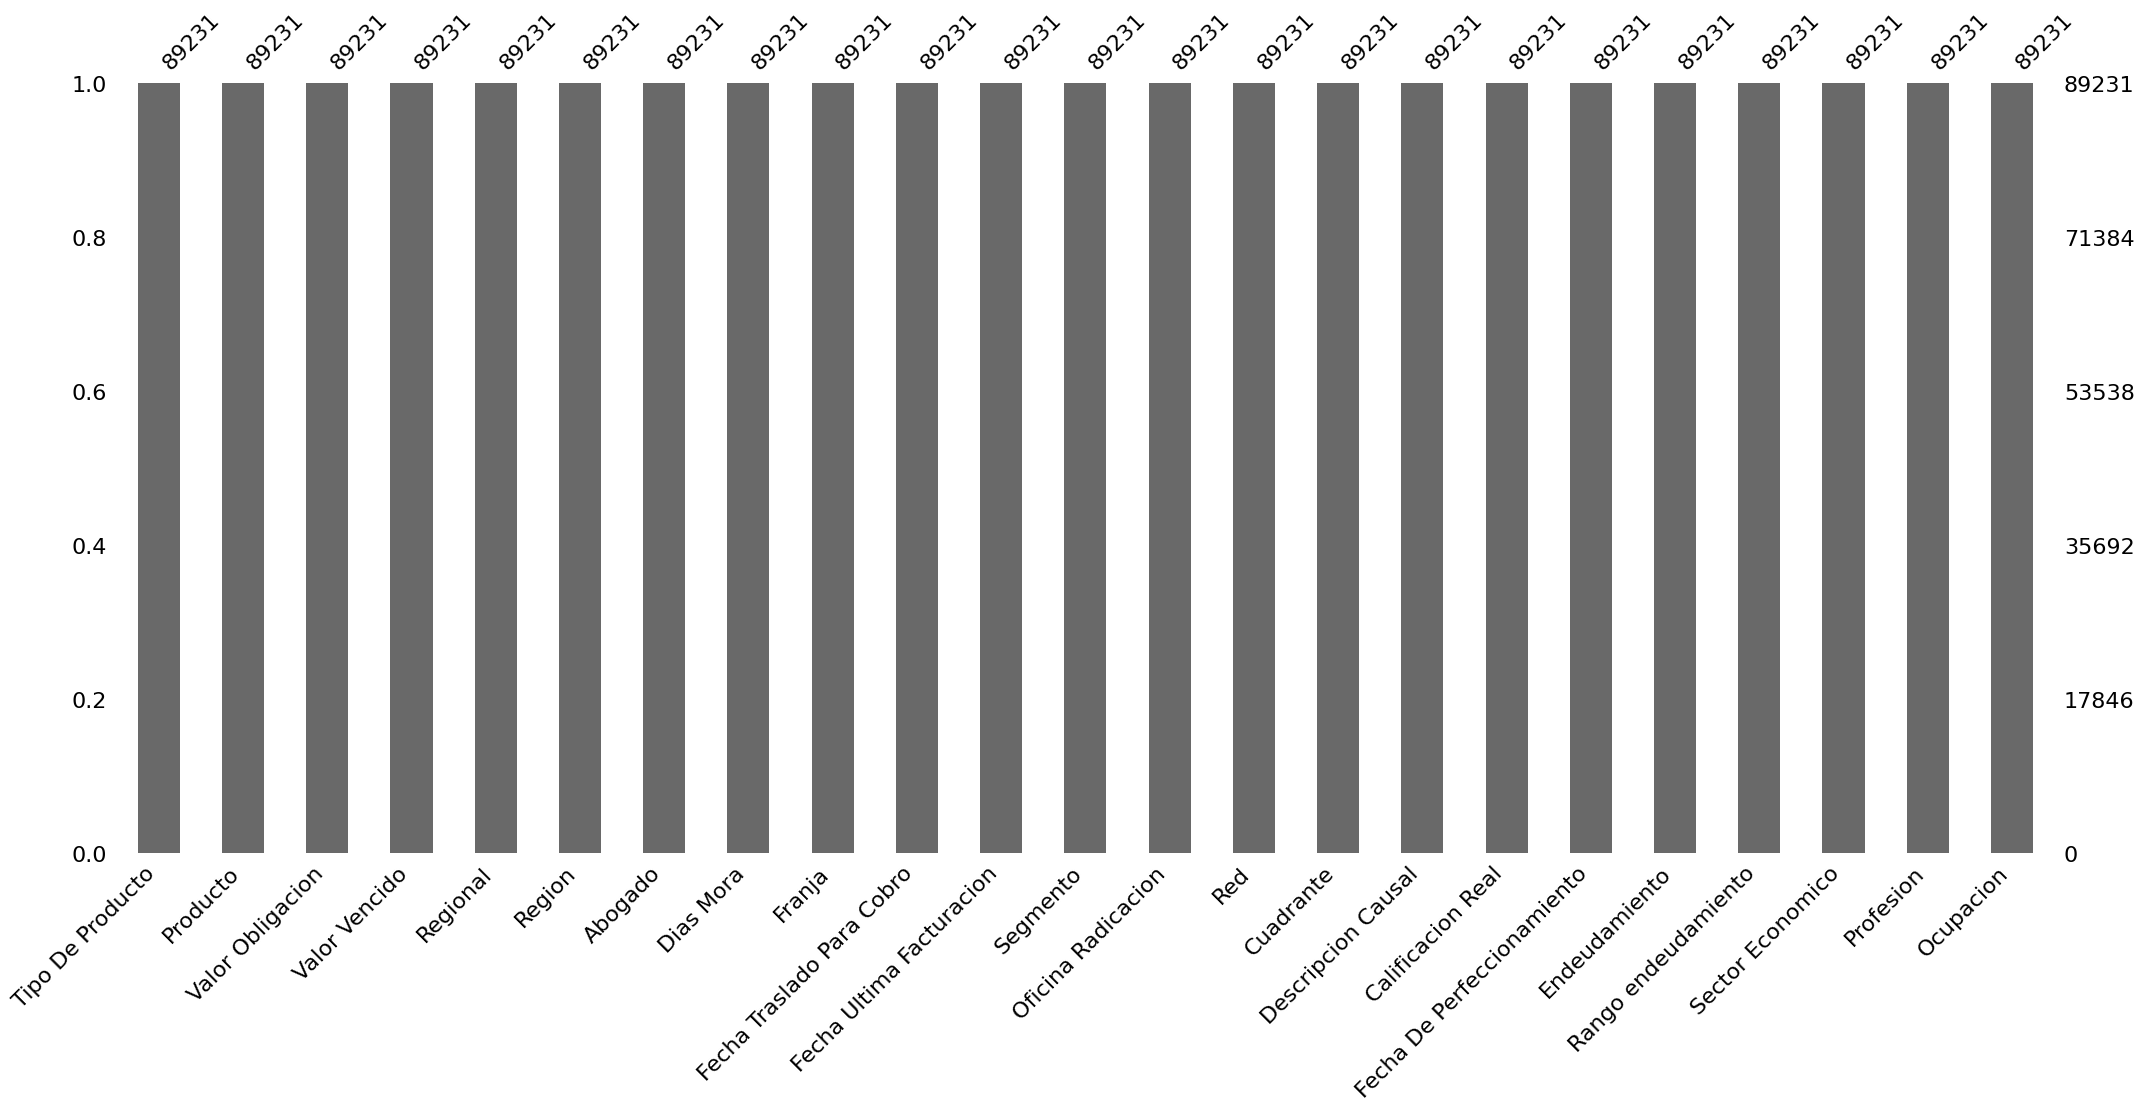

In [ ]:
msno.bar(data)

In [ ]:
data.head()

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,3,TARJETAS DE CREDITO,1675782.0,451144.0,2099,BOGOTA,109978,60,31-60,2015-05-24,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,1,2005-11-25,3051820.0,2015-01-01 00:00:00,OTROS,ABOGADO,JUBILADO
1,16,VEHICULOS SUFI,13833384.0,1357457.0,2099,BOGOTA,109978,24,<30,2015-06-04,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,2011-10-31,13833384.0,2015-01-01 00:00:00,OTROS,ABOGADO,INDEPENDIENTE
2,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,109978,60,31-60,2015-05-31,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,OTROS,SIN PROFESION,JUBILADO
3,16,VEHICULOS SUFI,27960592.0,3593669.0,2099,BOGOTA,109976,105,91-120,2015-06-13,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,2013-07-10,27960592.0,15-50,OTROS,ABOGADO,INDEPENDIENTE
4,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,109978,48,31-60,2015-05-29,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


Haciendo una validación nuevamente por las columnas nos hemos encontrado un valor atipico en la columna de Rango endeudamiento. Como se ve a continuación:

In [ ]:
# Verificamos un conteo de los valores asociados a la columna
data['Rango endeudamiento'].value_counts()

2015-01-01 00:00:00    45693
15-50                  19133
<1M                    18902
50-100                  4340
100-200                  916
>200                     247
Name: Rango endeudamiento, dtype: int64

Se hizo un análisis en el dataframe donde se pudo evidenciar que había valores en la columna de endeudamiento que estaban bajo un rango que se omitía, como lo eran los clientes con endeudamiento entre más de 1 millón y menor de 15 millones.

Con base a esto, nos enfocamos en generar una nueva asignación de rangos con base al nivel de endeudamiento del cliente.

In [ ]:
# Definir una función para reasignar los valores de 'Rango endeudamiento' en función de 'Endeudamiento'
def reasignar_rango_endeudamiento(row):
    if row['Endeudamiento'] < 1000000:
        return '<1M'
    elif 1000000 <= row['Endeudamiento'] < 15000000:
        return '1-15'  # Nuevo rango
    elif 15000000 <= row['Endeudamiento'] < 50000000:
        return '15-50'
    elif 50000000 <= row['Endeudamiento'] < 100000000:
        return '50-100'
    elif 100000000 <= row['Endeudamiento'] < 200000000:
        return '100-200'
    else:
        return '>200'

# Aplicar la función para reasignar los valores en 'Rango endeudamiento'
data['Rango endeudamiento'] = data.apply(reasignar_rango_endeudamiento, axis=1)

Verificamos que el cambio haya sido aplicado correctamente

In [ ]:
# Verificamos un conteo de los valores asociados a la columna
data['Rango endeudamiento'].value_counts()

1-15       45693
15-50      19133
<1M        18902
50-100      4340
100-200      916
>200         247
Name: Rango endeudamiento, dtype: int64

Para dar un mejor manejo de los datos y evitar inconvenientes con el data set ya limpio. Generamos una copia de dicho data set bajo el nombre de cartera. Sobre esta copia de datos limpios es que generaremos todo el análisis exploratorio.

In [ ]:
# Crear una copia del DataFrame limpio
cartera = data.copy()

## 💻  **Análisis exploratorio de los datos**

In [ ]:
# Revisamos nuestro dataframe de copia
cartera.head()

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,3,TARJETAS DE CREDITO,1675782.0,451144.0,2099,BOGOTA,109978,60,31-60,2015-05-24,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,1,2005-11-25,3051820.0,1-15,OTROS,ABOGADO,JUBILADO
1,16,VEHICULOS SUFI,13833384.0,1357457.0,2099,BOGOTA,109978,24,<30,2015-06-04,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,2011-10-31,13833384.0,1-15,OTROS,ABOGADO,INDEPENDIENTE
2,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,109978,60,31-60,2015-05-31,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,1-15,OTROS,SIN PROFESION,JUBILADO
3,16,VEHICULOS SUFI,27960592.0,3593669.0,2099,BOGOTA,109976,105,91-120,2015-06-13,...,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,2013-07-10,27960592.0,15-50,OTROS,ABOGADO,INDEPENDIENTE
4,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,109978,48,31-60,2015-05-29,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,1-15,AGROPECUARIO,AGRICULTOR,TAXISTA


Luego de la limpieza del set de datos, validamos la opción de generar un gráfico para conocer como se puede tener un primer análisis a partir del comportamiento visual de dichos datos. Para ello nos gustaría iniciar con una identificación de la correlación entre las columnas.

<ipython-input-61-8e5043f2f3a2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cartera.corr()


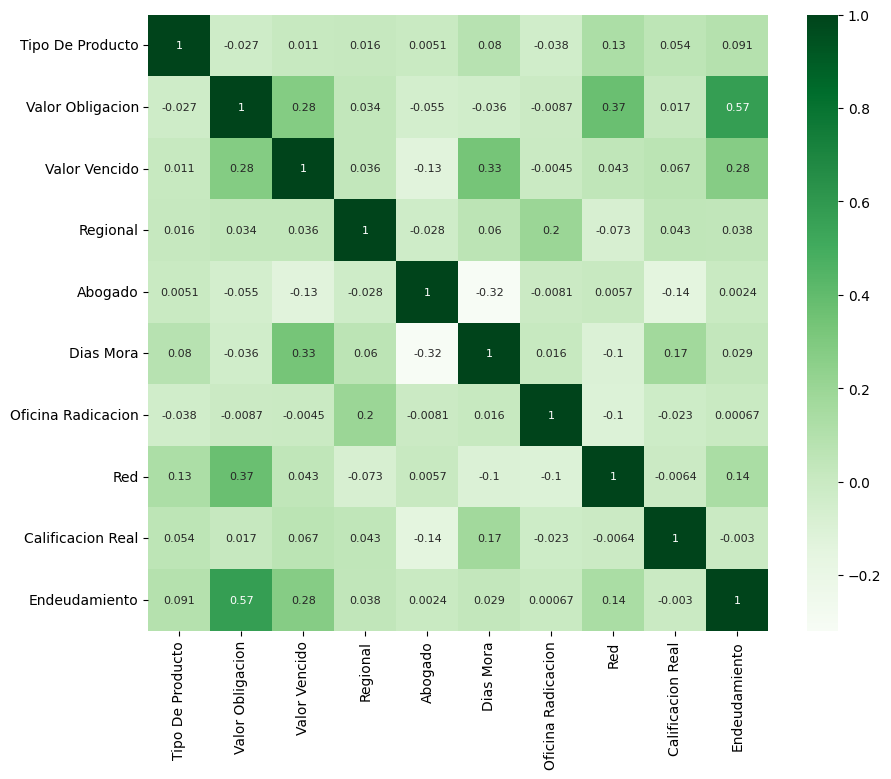

In [ ]:
# Importamos las librerias
import matplotlib.pyplot as plt
import seaborn as sns
# Se genera gráfico para analizar la posible correlación entre columnas
plt.figure(figsize=(10,8))
import seaborn as sns
corr = cartera.corr()
sns.heatmap(corr, cmap='Greens', annot=True, annot_kws={'size': 8})
plt.show()

Observando la gráfica, aparte de la correlación donde las columnas se comparan consigo mismas, solo se rescata una correlación y es entre la columna Valor Obligacion con la columna Endeudamiento con estado moderado de 0.57.

Podría ser útil y lo analizaremos en posteriores análisis para identificar una mejor toma de decisiones con estos datos.



---



Continuaremos trabajando en el proyecto con gráficos. Recordando que el objetivo es detectar las causales principales de incumplimiento y definir estrategias de recuperación de la cartera con base al perfil del cliente.

Estas visualizaciones de datos nos ayudarán a comprender mejor las tendencias de los datos.

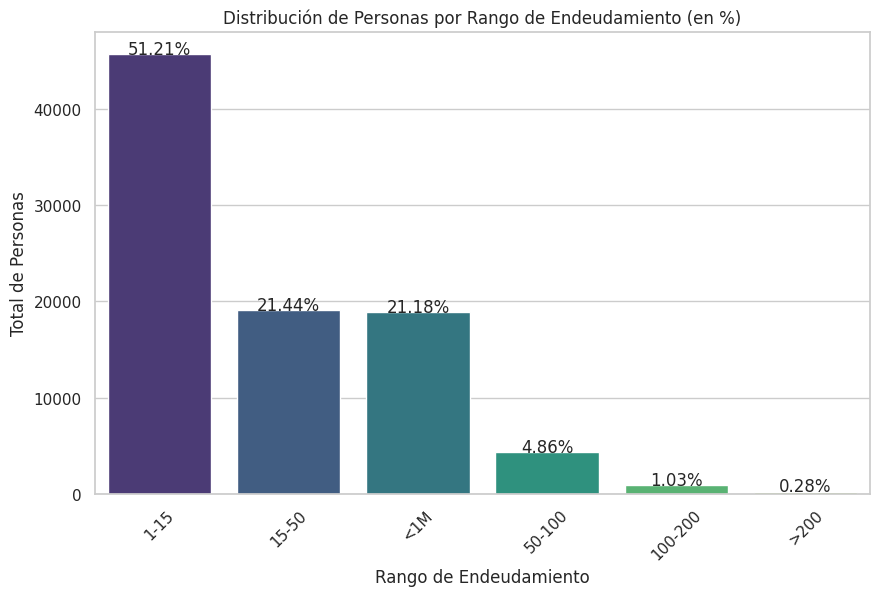

In [ ]:
sns.set(style="whitegrid")  # Establece el estilo del gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico

# Se calculan los porcentajes y crea un gráfico de barras con ellos
total = float(len(cartera))  # Obtiene el total de observaciones
ax = sns.countplot(data=cartera, x='Rango endeudamiento', palette='viridis')

# Se añaden los porcentajes en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.title('Distribución de Personas por Rango de Endeudamiento (en %)')
plt.xlabel('Rango de Endeudamiento')
plt.ylabel('Total de Personas')
plt.xticks(rotation=45)

plt.show()

Podemos ver que se tiene un poco más de la mitad del total de los clientes que se encuentran en un rango de endeudamiento entre 1 a 15 millones representado por un 51.2%.

El rango que menor representa porcentaje sería el de los perfiles que tienen un rango de endeudamiento superior a los 200 millones.

In [ ]:
# Agrupamos por 'Rango Endeudamiento' y calcula la suma de 'Endeudamiento'
agregado_por_segmento_1_15 = cartera[cartera['Rango endeudamiento'] == '1-15'].groupby('Rango endeudamiento')['Endeudamiento'].sum()
valor_legible = '{:.2f}'.format(agregado_por_segmento_1_15.iloc[0])

# Muestra la suma de Endeudamiento para el grupo '1-15'
print(f'El valor de Endeudamiento para el grupo 1-15 es: {valor_legible}')

El valor de Endeudamiento para el grupo 1-15 es: 238141205105.55


In [ ]:
# Agrupamos por 'Rango Endeudamiento' y calcula la suma de 'Endeudamiento'
agregado_por_segmento_200 = cartera[cartera['Rango endeudamiento'] == '>200'].groupby('Rango endeudamiento')['Endeudamiento'].sum()
valor_legible_200 = '{:.2f}'.format(agregado_por_segmento_200.iloc[0])

# Muestra la suma de Endeudamiento para el grupo '>200'
print(f'El valor de Endeudamiento para el grupo >200 es: {valor_legible_200}')

El valor de Endeudamiento para el grupo >200 es: 79757125195.92


✅  **Conclusión:**

En este primer análisis por rango de endeudamiento quisimos revisar si el porcentaje de clientes conglomerado en el segmento del grupo de rango Endeudamiento de 1-15 millones tenía un total superior en su valor de endeudamiento, respecto al grupo de clientes que pertenecen al rango de >200 millones.

En esta parte pudimos identificar que el grupo de 1-15 tiene un valor de endeudamiento 2.9 veces mayor que el total obtenido en el valor de endeudamiento del grupo de >200.



---



Ahora vamos a hacer un Zoom en este segmento de clientes del rango 1-15 que represente el mayor porcentaje. Donde vamos a verificar cuáles son las principales causales de su incumplimiento con los pagos.

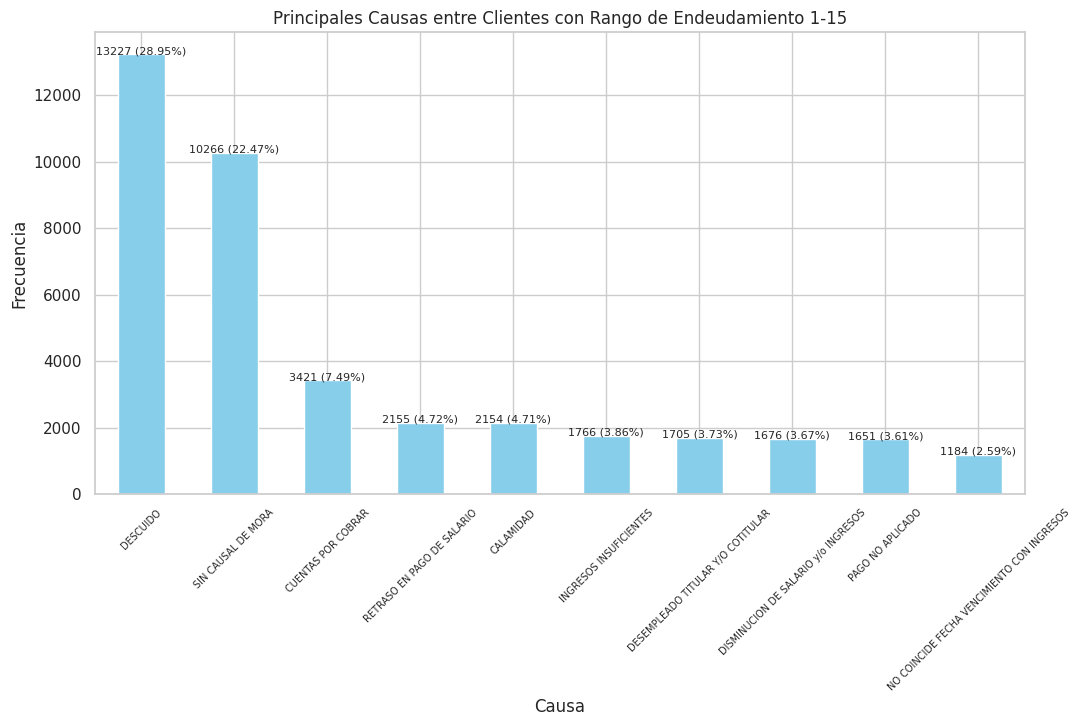

In [ ]:
# Se filtra el DataFrame para 'Rango Endeudamiento' igual a '1-15'
clientes_1_15 = cartera[cartera['Rango endeudamiento'] == '1-15']

# Contamos la frecuencia de cada 'Descripcion Causal'
causas_principales = clientes_1_15['Descripcion Causal'].value_counts().head(10)

# Se calculan los porcentajes y se crea un gráfico de barras
total_clientes = len(clientes_1_15)
porcentajes = (causas_principales / total_clientes) * 100

plt.figure(figsize=(12, 6))
ax = causas_principales.plot(kind='bar', color='skyblue')

# Se agregan los porcentajes en las barras
for i, v in enumerate(causas_principales):
    ax.text(i, v + 1, f'{v} ({porcentajes[i]:.2f}%)', ha='center', fontsize=8)

plt.title('Principales Causas entre Clientes con Rango de Endeudamiento 1-15')
plt.xlabel('Causa')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, fontsize=7)
plt.show()

✅  **Conclusión:**

Hemos evidenciado que la principal causal por la cual las personas de este segmento en particular entran en impago, es por tema de descuido en sus obligaciones crediticias.

De ese, 51.2 porciento de las personas del rango de endeudamiento que agrupan un total mayor de valor de endeudamiento. El 28.9 porciento entran en el estado de impago por descuido del cliente.

También encontramos las siguientes observaciones:

* El segundo porcentaje que encontramos en esta revisión, hace referencia al estatus de sin causal de mora. Esto nos quiere indicar que puede ser un segmento de clientes que no quiso brindar información del motivo de su impago o que no busca responder por dicha obligación o quizás no se logró obtener un contacto eficiente al momento de gestionar dicha cartera por parte del abogado.

* Entre los porcentajes más bajos encontramos que están más orientados a situaciones de pago no aplicado y falta de coincidencia entre fechas de ingreso del cliente y pago de sus obligaciones. Esto nos podría dar una idea para revisar y mejorar los procesos de cobro o ya bien los medios para hacer más sencilla la forma de pagar de cara al usuario.



---

Ahora continuamos revisando como esta compuesto los clientes por cuadrante.

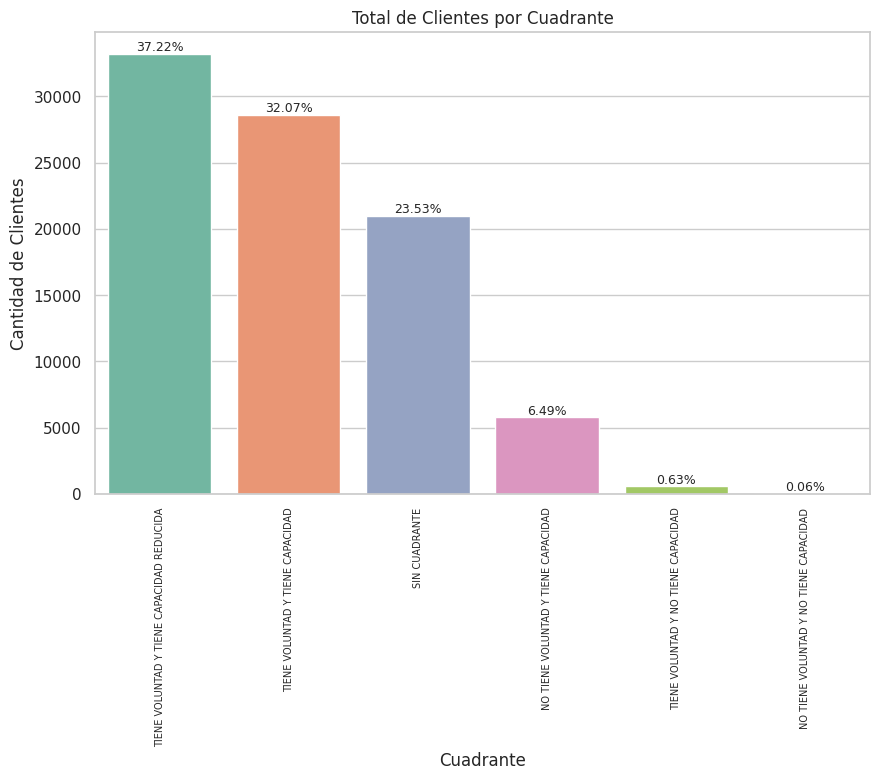

In [ ]:
# Se cuenta la frecuencia de cada valor en la columna 'Cuadrante'
cuadrante_counts = cartera['Cuadrante'].value_counts()

# Se crea un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cuadrante_counts.index, y=cuadrante_counts.values, palette='Set2')

# Añadimos etiquetas de porcentaje
total = len(cartera)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=9)

plt.title('Total de Clientes por Cuadrante')
plt.xlabel('Cuadrante')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=90, fontsize=7)
plt.show()

✅  **Conclusión:**

* Podemos identificar que aproximadamente casi un 70% de los clientes tienen una orientación a tener voluntad de pago, bien sea que cuenten con la capacidad para ello o se tenga reducida, pero la conclusión con este segmento de clientes es que finalmente quieren pagar. Por lo que se podrían buscar alternativas de negociación más efectivas que permitan tener una recuperación de dicha cartera.

* De otro lado tenemos unos porcentajes inferiores de las personas que no tienen voluntad, o no tienen capacidad, o no tienen ninguna de ambas. En algunos casos estos porcentajes son inferiores al 1% y el de mayor visibilidad es el cuadrante 'NO TIENE VOLUNTAD Y TIENE CAPACIDAD' que representa un 6.49%.

* También se tiene una duda generada en este punto por el porcentaje de clientes que no tienen un cuadrante asignado. Por lo que podríamos hacer una revisión, para entender si estos clientes entrarían a hacer parte del segmento de quienes no tienen o no pueden enfocarse en querer buscar salir de sus impagos. Como también podrían hacer parte de los clientes que sí y esto nos cambiaría a un panorama más favorable en la recuperación de la cartera.



---



Ahora continuamos revisando como esta compuesto las ocupaciones de los clientes por su respectivo cuadrante.

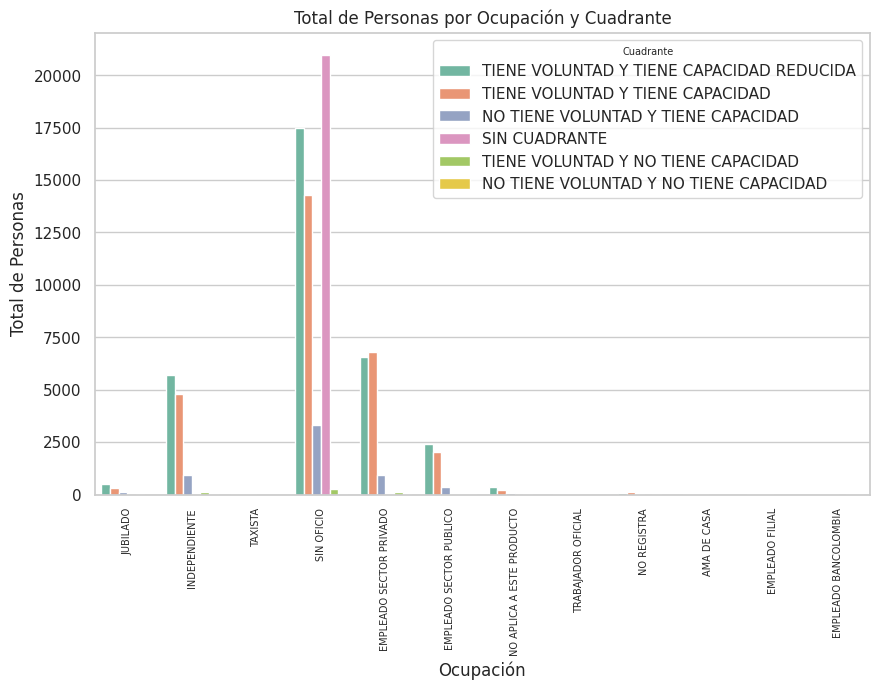

In [ ]:
# Se filtra el DataFrame para excluir los valores NaN en la columna 'Ocupacion'
cartera_filtrada = cartera.dropna(subset=['Ocupacion'])

# Se crea un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=cartera_filtrada, x='Ocupacion', hue='Cuadrante', palette='Set2')
plt.title('Total de Personas por Ocupación y Cuadrante')
plt.xlabel('Ocupación')
plt.ylabel('Total de Personas')
plt.xticks(rotation=90, fontsize='7')
plt.legend(title='Cuadrante', title_fontsize='7')
plt.show()

✅  **Conclusión:**

* Hemos identificado que la gran mayoría de personas sin un cuadrante definido tienen como ocupación el estar sin oficio. También vemos como se resalta que la gran mayoría de clientes en los diferentes cuadrantes hacen parte de este tipo de ocupación.

* Aparte de los clientes sin oficio, las ocupaciones que más sobresalen son las de empleados del sector privado e independientes.

* Para el caso de los clientes independientes se destacan los que tienen voluntad de pago, pero capacidad reducida, esto tiene sentido, pues está muy relacionado con su ocupación por ser personas que manejan ingresos variables.

* Para el caso de los clientes que son empleados del sector privado vemos que manejan capacidad de pago y tienen voluntad del mismo.



---



Validamos como está repartido el total del valor de las obligaciones respecto a cada tipo de producto.

In [ ]:
# Filtramos el DataFrame para excluir valores NaN en la columna 'Producto' y 'Valor Obligacion'
cartera_filtrada = cartera.dropna(subset=['Producto', 'Valor Obligacion'])

# Se calcula la suma total del valor de obligación por producto
suma_valor_obligacion_por_producto = cartera_filtrada.groupby('Producto')['Valor Obligacion'].sum().reset_index()

# Se crea un gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(suma_valor_obligacion_por_producto['Valor Obligacion'], labels=suma_valor_obligacion_por_producto['Producto'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Valor Total de Obligación por Producto')
plt.axis('equal')
plt.show()

✅  **Conclusión:**

* Se identifica que el valor total de obligaciones en su gran mayoría está relacionado al producto CH Propia, representando con un 42%. Luego le siguen los productos de Consumo y Vehículos SUFI con un 22.9% y 16.7% respectivamente.

Haremos un zoom a este tema de productos para identificar en que categoría de Producto se agrupan los códigos de tipo de producto.

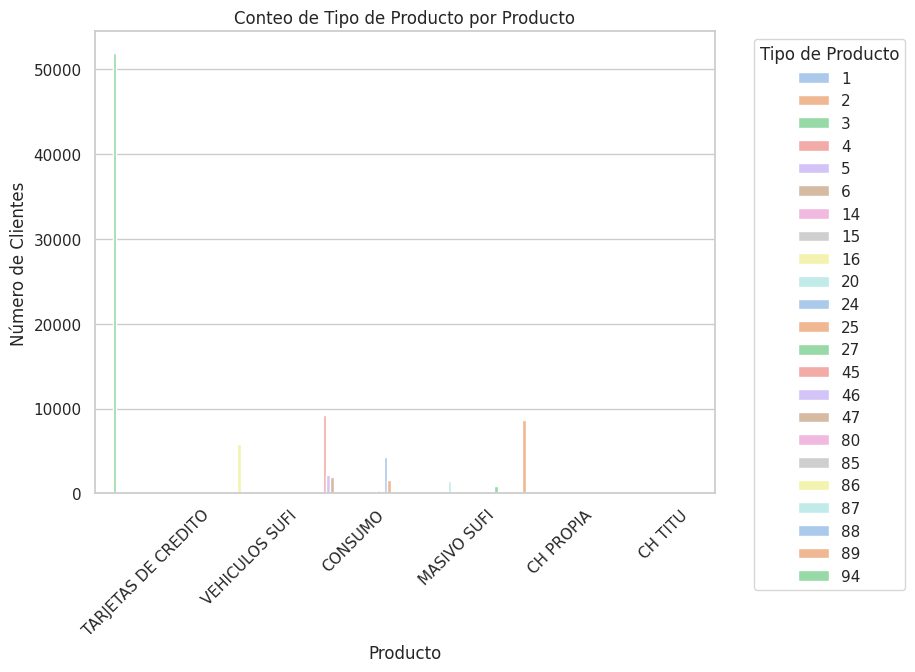

In [ ]:
# Generamos grafico para analizar el conteo de tipo de producto por Producto
plt.figure(figsize=(8, 6))
sns.countplot(data=cartera, x='Producto', hue='Tipo De Producto', palette='pastel')  # Cambia la paleta de colores
plt.title('Conteo de Tipo de Producto por Producto')
plt.xlabel('Producto')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x en un ángulo de 45 grados
plt.legend(title='Tipo de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.show()

✅  **Conclusión:**

* Se visualiza que la gran mayoría de solicitudes de un tipo de producto en particular están relacionados con la categoría de producto Tarjeta de Crédito.

Esto nos hace ver que a pesar de que haya más cobranzas asociadas a Tarjeta de Crédito, estas no son las que representan el mayor valor de obligaciones por producto.



---



Hacemos un análisis de cuáles son las sucursales donde se están otorgando mayor número de créditos que están quedando en mora.

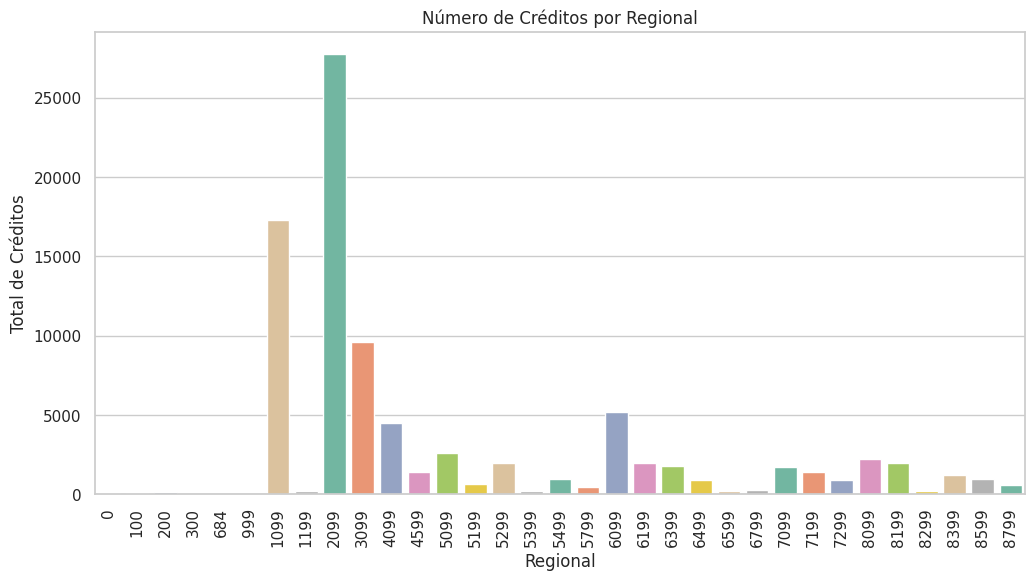

In [ ]:
# Filtra el DataFrame para excluir valores NaN en la columna 'Region' y 'Regional'
cartera_filtrada = cartera.dropna(subset=['Region', 'Regional'])

# Calcula el número de créditos por regional
num_creditos_por_regional = cartera_filtrada['Regional'].value_counts().reset_index()
num_creditos_por_regional.columns = ['Regional', 'Número de Créditos']

# Ordena el DataFrame por el número de créditos en orden descendente
num_creditos_por_regional = num_creditos_por_regional.sort_values(by='Número de Créditos', ascending=False)

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=num_creditos_por_regional, x='Regional', y='Número de Créditos', palette='Set2')
plt.title('Número de Créditos por Regional')
plt.xlabel('Regional')
plt.ylabel('Total de Créditos')
plt.xticks(rotation=90)
plt.show()

En el gráfico vemos como algunas regionales sobresalen en el número de créditos asociados a su generación por cada cliente. Para hacer un análisis más oportuno filtraremos las 10 regionales con más créditos, al igual que nos permita conocer a qué región pertenecen.

In [ ]:
# Se filtra el DataFrame para excluir valores NaN en la columna 'Region' y 'Regional'
cartera_filtrada = cartera.dropna(subset=['Region', 'Regional'])

# Se Calcula el número de créditos por regional
num_creditos_por_regional = cartera_filtrada.groupby(['Region', 'Regional']).size().reset_index(name='Número de Créditos')

# Se ordena el DataFrame por el número de créditos en orden descendente
num_creditos_por_regional = num_creditos_por_regional.sort_values(by='Número de Créditos', ascending=False)

# Se muestran las 10 regionales con mayor número de créditos
top_regionales = num_creditos_por_regional.head(10)
print(top_regionales)

       Region  Regional  Número de Créditos
8      BOGOTA      2099               27733
0   ANTIOQUIA      1099               17260
27        SUR      3099                9568
17     CENTRO      6099                5185
9      CARIBE      4099                4501
11     CARIBE      5099                2573
23     CENTRO      8099                2235
13     CARIBE      5299                1978
24     CENTRO      8199                1975
18     CENTRO      6199                1940


Vemos que estas regionales están asociadas principalmente a las regiones de Bogotá, Antioquia, Sur, Centro y Caribe. Aunque. Esto no es algo tan relevante si nos permite conocer que tantas regionales por región tiene un alto cúmulo de créditos generados para saber si se deben atender ciertas estrategias de manejo al momento de expedir obligaciones crediticias.

In [ ]:
# Filtra el DataFrame para incluir solo las filas de las 10 regionales con más créditos
top_10_regionales = top_regionales['Regional'].tolist()
cartera_top_10_regionales = cartera[cartera['Regional'].isin(top_10_regionales)]

# Se encuentra el valor más frecuente de 'Dias Mora' en estas regionales
valor_mas_frecuente_dias_mora = cartera_top_10_regionales['Dias Mora'].mode().iloc[0]

print(f"El valor más frecuente de 'Dias Mora' en las 10 regionales con más créditos es: {valor_mas_frecuente_dias_mora}")

El valor más frecuente de 'Dias Mora' en las 10 regionales con más créditos es: 30


In [ ]:
# Filtra el DataFrame para incluir solo las filas de las 10 regionales con más créditos
top_10_regionales = top_regionales['Regional'].tolist()
cartera_top_10_regionales = cartera[cartera['Regional'].isin(top_10_regionales)]

# Se encuentra el valor más frecuente de 'Dias Mora' para cada regional
valores_mas_frecuentes = cartera_top_10_regionales.groupby('Regional')['Dias Mora'].apply(lambda x: x.mode().iloc[0]).reset_index()

print(valores_mas_frecuentes)

✅  **Conclusión:**

* Se identifica que las regionales con mayor número de créditos otorgados son una regional de Bogotá que ocupa la gran mayoría, le siguen una regional de Antioquia y otra de la zona sur. Entre las 10 regionales con mayor números de créditos asociados se identifico que la constante que más se repite por días de mora, es de 30 días.




---



Se analizara como estan manejando los abogados la carga de las gestiones de cobranza.

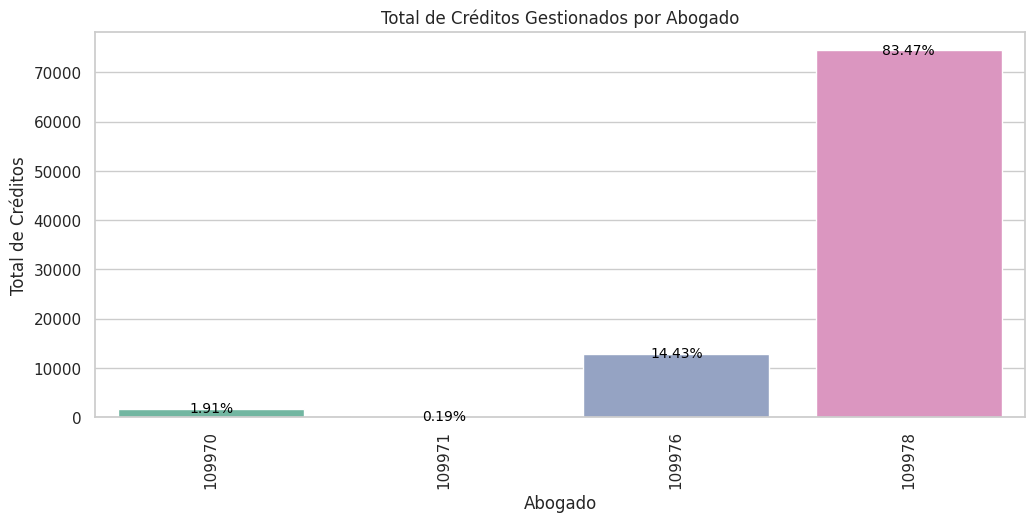

In [ ]:
# Se crea un gráfico de barras para mostrar el total de créditos gestionados por cada abogado
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=cartera, x='Abogado', palette='Set2')
plt.title('Total de Créditos Gestionados por Abogado')
plt.xlabel('Abogado')
plt.ylabel('Total de Créditos')
plt.xticks(rotation=90)

# Calcular el porcentaje y agregar anotaciones a las barras
total_registros = len(cartera)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_registros:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black')

plt.show()

✅  **Conclusión:**

* Se visualiza que la gestión de cobranza está distribuida entre 4 abogados, donde uno de ellos está llevando el 83.4 % de la carga del seguimiento de dichas obligaciones.

Esto puede ser algo no muy productivo, ya que esta persona quizás tenga las habilidades, pero no sería óptimo en cuanto a capacidad operativa en la mejora de una estrategia de recuperación de cartera.

Sabiendo que se tienen más personas en el equipo de gestión de cobranza. Se recomendaría redistribuir las solicitudes, para que entre el equipo sean más equilibradas la cargas y que esto sé  refleje en una mejor objetividad y gestión de la cobranza por parte de la organización.









---

Finalmente revisamos el analisis en la distribución de franjas de dias en mora por segmento de clientes.

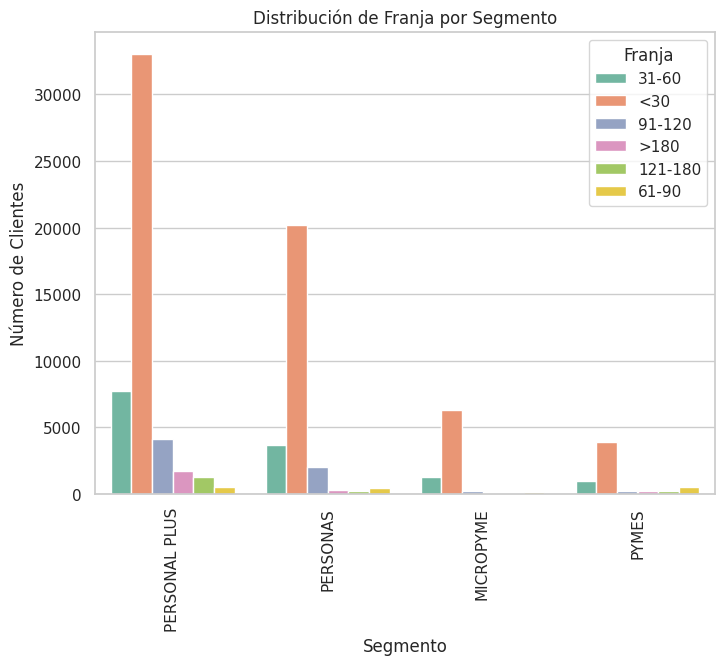

In [ ]:
# Se crea una gráfica de como se distribuyen las franjas de días en mora de un cliente respecto a los segmentos
plt.figure(figsize=(8, 6))
sns.countplot(data=cartera, x='Segmento', hue='Franja', palette='Set2')
plt.title('Distribución de Franja por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90)
plt.legend(title='Franja')
plt.show()

✅  **Conclusión:**

* Se identifica que los clientes que están en la franja de días de mora de menor a 30 días. Son los que tiene mayor presencia entre los diferentes segmentos. Posteriormente le siguen las franjas de 31-60 días y la de 91-120 días.

* Tambien se puede evidenciar que la gran mayoria de clientes han sido segmentados bajo la etiqueta de Personal Plus.

## 🤖  **Preparar Datos para el Modelado**

In [ ]:
print(cartera.dtypes)

Tipo De Producto                       int64
Producto                              object
Valor Obligacion                     float64
Valor Vencido                        float64
Regional                               int64
Region                                object
Abogado                                int64
Dias Mora                              int64
Franja                                object
Fecha Traslado Para Cobro     datetime64[ns]
Fecha Ultima Facturacion      datetime64[ns]
Segmento                              object
Oficina Radicacion                     int64
Red                                    int64
Cuadrante                             object
Descripcion Causal                    object
Calificacion Real                      int64
Fecha De Perfeccionamiento    datetime64[ns]
Endeudamiento                        float64
Rango endeudamiento                   object
Sector Economico                      object
Profesion                             object
Ocupacion 

In [98]:
agrupamientos_cartera = cartera.copy()

In [99]:
 # Lista de columnas a eliminar
columnas_a_eliminar_segmentacion = ['Tipo De Producto', 'Producto', 'Regional', 'Region', 'Abogado', 'Fecha Traslado Para Cobro',
                                    'Fecha Ultima Facturacion', 'Segmento', 'Oficina Radicacion', 'Red', 'Calificacion Real',
                                    'Fecha De Perfeccionamiento', 'Rango endeudamiento', 'Sector Economico', 'Profesion',
                                    'Descripcion Causal', 'Ocupacion', 'Valor Vencido']

# Eliminar las columnas
agrupamientos_cartera = agrupamientos_cartera.drop(columnas_a_eliminar_segmentacion, axis=1)

In [100]:
agrupamientos_cartera.columns

Index(['Valor Obligacion', 'Dias Mora', 'Franja', 'Cuadrante',
       'Endeudamiento'],
      dtype='object')

Crear una variable para conocer el porcentaje de endeudameinto de un cliente con base a las columnas de Valor Obligacion y Endeudamiento.

In [101]:
# Crear una nueva columna llamada 'Porcentaje Endeudamiento'
agrupamientos_cartera['Porcentaje Endeudamiento'] = (agrupamientos_cartera['Valor Obligacion'] / agrupamientos_cartera['Endeudamiento']) * 100

In [102]:
columnas_a_eliminar_paso2 = ['Valor Obligacion', 'Endeudamiento']

# Eliminar las columnas
agrupamientos_cartera = agrupamientos_cartera.drop(columnas_a_eliminar_paso2, axis=1)

In [103]:
agrupamientos_cartera.columns

Index(['Dias Mora', 'Franja', 'Cuadrante', 'Porcentaje Endeudamiento'], dtype='object')

In [104]:
# Aplicar codificación one-hot a la columna "Franja"
agrupamientos_cartera = pd.get_dummies(agrupamientos_cartera, columns=['Franja'], prefix='Franja', drop_first=True)

In [105]:
# Aplicar codificación one-hot a la columna "Cuadrante"
agrupamientos_cartera = pd.get_dummies(agrupamientos_cartera, columns=['Cuadrante'], prefix='Cuadrante', drop_first=True)

In [ ]:
# Aplicar codificación one-hot a la columna "Descripcion Causal"
# agrupamientos_cartera = pd.get_dummies(agrupamientos_cartera, columns=['Descripcion Causal'], prefix='Descripcion Causal', drop_first=True)

In [ ]:
# Aplicar codificación one-hot a la columna "Ocupacion"
# agrupamientos_cartera = pd.get_dummies(agrupamientos_cartera, columns=['Ocupacion'], prefix='Ocupacion', drop_first=True)

In [ ]:
# Crear un subconjunto de datos con las categorías que deseas codificar one-hot
# categorias_seleccionadas_ocupacion = ['SIN OFICIO', 'EMPLEADO SECTOR PRIVADO', 'INDEPENDIENTE', 'EMPLEADO SECTOR PUBLICO', 'JUBILADO', 'NO APLICA A ESTE PRODUCTO']

# Aplicar codificación one-hot solo a las categorías seleccionadas
# for categoria in categorias_seleccionadas_ocupacion:
#    agrupamientos_cartera[f'Ocupacion_{categoria}'] = (agrupamientos_cartera['Ocupacion'] == categoria).astype(int)

# Eliminar la columna original 'Ocupacion'
# agrupamientos_cartera = agrupamientos_cartera.drop('Ocupacion', axis=1)

Validamos el estado del datataset y los tipos de datos luego de la conversión aplicada

In [106]:
agrupamientos_cartera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89231 entries, 0 to 89246
Data columns (total 12 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Dias Mora                                            89231 non-null  int64  
 1   Porcentaje Endeudamiento                             89231 non-null  float64
 2   Franja_31-60                                         89231 non-null  uint8  
 3   Franja_61-90                                         89231 non-null  uint8  
 4   Franja_91-120                                        89231 non-null  uint8  
 5   Franja_<30                                           89231 non-null  uint8  
 6   Franja_>180                                          89231 non-null  uint8  
 7   Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD        89231 non-null  uint8  
 8   Cuadrante_SIN CUADRANTE                              89231 non-nul

Procedemos a escalar los datos para generar un agrupamiento k-medias

In [107]:
# Importamos las librerias requeridas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Se escalan los datos, para ello se crea una Instancia para Standard Scaler
scaler = StandardScaler()

# Ajustamos y transformamos la información
X_scaled = pd.DataFrame(scaler.fit_transform(agrupamientos_cartera), columns=agrupamientos_cartera.columns)
X_scaled.head()

,Dias Mora,Porcentaje Endeudamiento,Franja_31-60,Franja_61-90,Franja_91-120,Franja_<30,Franja_>180,Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD,Cuadrante_SIN CUADRANTE,Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD,Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD,Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA
0,0.183986,-0.421001,2.357892,-0.134218,-0.282873,-1.564952,-0.162331,-0.263396,-0.554657,-0.079826,-0.687109,1.298765
1,-0.329511,0.790931,-0.424108,-0.134218,-0.282873,0.638997,-0.162331,-0.263396,-0.554657,-0.079826,1.455373,-0.769962
2,0.183986,-0.930287,2.357892,-0.134218,-0.282873,-1.564952,-0.162331,-0.263396,-0.554657,-0.079826,-0.687109,1.298765
3,0.825856,0.790931,-0.424108,-0.134218,3.535160,-1.564952,-0.162331,-0.263396,-0.554657,-0.079826,1.455373,-0.769962
4,0.012820,0.790931,2.357892,-0.134218,-0.282873,-1.564952,-0.162331,-0.263396,-0.554657,-0.079826,1.455373,-0.769962


Al momento no tengo claridad de cuantas agrupaciones podría identificar, por lo que supondremos que al momento serían dos clústeres

In [108]:
# Instacio a KMeans en una variable y lo ajusto a los datos escalados
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Se encajan modos de k-medias con diferentes números de clústeres para identificar cuántos son los óptimos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

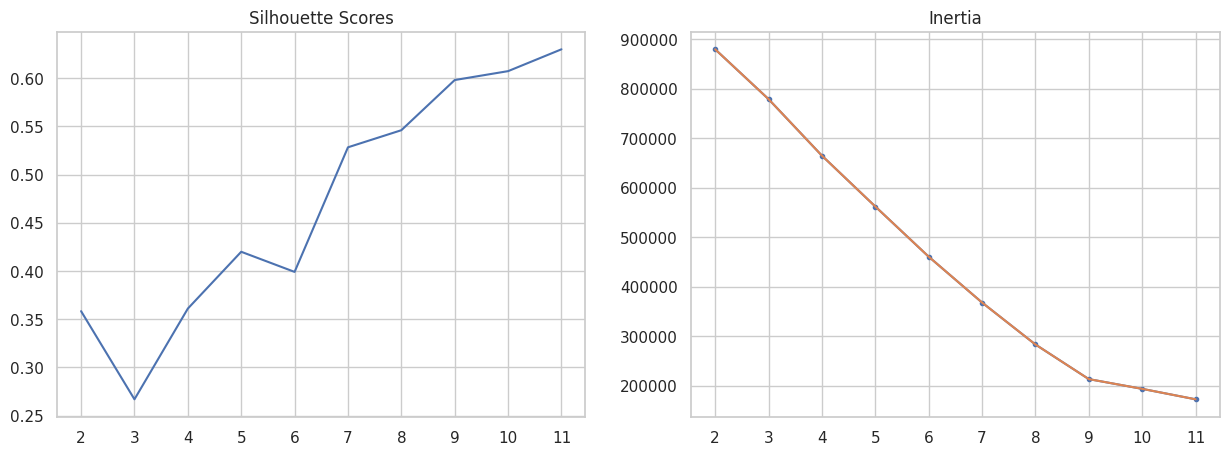

In [109]:
# Recorremos en un ciclo los valores k entre 2 y 10 y almacena las inercias en la lista.
ks = range(2,12)
sils = []
inertias = []

# Iteramos sobre el rango de K Clusters para buscar el numéro optimo de clusters
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

# Dibujo las inercias y valores de silueta por cada numéro de clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.plot(range(2,12), inertias, marker = '.')
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)

axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Puedo observar que agrupar los datos en 3 grupos nos da la mejor puntuación de silueta.

En el trazado de inercia tiene un codo, donde inicia su pronunciación entre 3 y 4, la puntuación de silueta parece favorecer los grupos mejor en 3. Así que hemos decidido escoger 3 como el valor de clústeres.

Ajusto un nuevo modelo con 3 clústeres y agrego esos clústeres a una nueva columna en el dataframe original.

In [110]:
# Reajusto KMeans con 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X_scaled)

# Añadir los clusteres como columna al dataframe
agrupamientos_cartera['cluster'] = kmeans.labels_
agrupamientos_cartera.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Dias Mora,Porcentaje Endeudamiento,Franja_31-60,Franja_61-90,Franja_91-120,Franja_<30,Franja_>180,Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD,Cuadrante_SIN CUADRANTE,Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD,Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD,Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,cluster
0,60,54.910906,1,0,0,0,0,0,0,0,0,1,4
1,24,100.000000,0,0,0,1,0,0,0,0,1,0,1
2,60,35.963306,1,0,0,0,0,0,0,0,0,1,4
3,105,100.000000,0,0,1,0,0,0,0,0,1,0,2
4,48,100.000000,1,0,0,0,0,0,0,0,1,0,4


Procedemos a analizar los clústeres para obtener algunas estadísticas resumidas sobre cada clúster. Agrupare los datos por clúster y agregare los grupos por los valores medios de cada característica.

In [111]:
# Agrupo el dataframe por cluster y agregar por valores medios
# Añado as_index=False para que los clusters sean una columna, no el índice
cluster_groups = agrupamientos_cartera.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Dias Mora,Porcentaje Endeudamiento,Franja_31-60,Franja_61-90,Franja_91-120,Franja_<30,Franja_>180,Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD,Cuadrante_SIN CUADRANTE,Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD,Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD,Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA
0,0,27.882252,74.875752,0.000000,0.000000,0.000000,0.993223,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
1,1,23.562741,72.042903,0.000000,0.000000,0.000000,0.991263,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
2,2,114.023292,72.094891,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.135811,0.0,0.207399,0.656448
3,3,363.684046,31.503122,0.000000,0.000000,0.000000,0.000000,1.000000,0.137701,0.047683,0.0,0.086898,0.727718
4,4,52.325699,70.756152,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146295,0.0,0.300556,0.552900
5,5,76.518495,74.401078,0.000000,1.000000,0.000000,0.000000,0.000000,0.118622,0.115434,0.0,0.152423,0.613520
6,6,90.051327,49.722617,0.118584,0.019469,0.293805,0.375221,0.083186,0.000000,0.000000,1.0,0.000000,0.000000
7,7,30.049527,69.665861,0.000000,0.000000,0.000000,0.943632,0.000000,0.000000,0.000000,0.0,0.000000,0.997472
8,8,48.585002,68.368349,0.280506,0.000000,0.114469,0.555723,0.000000,1.000000,0.000000,0.0,0.000000,0.000000


In [112]:
# Calcula la matriz de correlación
correlation_matrix = cluster_groups.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

                                                     cluster  Dias Mora  \
cluster                                             1.000000  -0.099848   
Dias Mora                                          -0.099848   1.000000   
Porcentaje Endeudamiento                           -0.109379  -0.871375   
Franja_31-60                                        0.187560  -0.184197   
Franja_61-90                                        0.142583  -0.054274   
Franja_91-120                                      -0.131430   0.059120   
Franja_<30                                         -0.114666  -0.553353   
Franja_>180                                        -0.114950   0.963892   
Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD       0.554945  -0.027462   
Cuadrante_SIN CUADRANTE                            -0.598103  -0.203357   
Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD       0.273861  -0.006350   
Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD         -0.476070  -0.198549   
Cuadrante_TIENE VOLUNTAD 

Inicialmente, voy a crear un gráfico de las visualizaciones de agrupamiento con los clusters predeterminados contra lo recomendado basándome en las mejores puntuaciones de correlación entre columnas de características.

In [95]:
# Ajustamos 2 modelos KMeans diferentes, uno con 2 clusters y otro con 3 clusters que el fue de mejor valoración en puntuación de silueta
kmeans2 = KMeans(n_clusters = 2)
kmeans9 = KMeans(n_clusters = 9)
kmeans2.fit(X_scaled)
kmeans9.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [96]:
agrupamientos_cartera.columns

Index(['Valor Vencido', 'Dias Mora', 'Porcentaje Endeudamiento',
       'Franja_31-60', 'Franja_61-90', 'Franja_91-120', 'Franja_<30',
       'Franja_>180', 'Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD',
       'Cuadrante_SIN CUADRANTE',
       'Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD',
       'Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD',
       'Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA', 'cluster'],
      dtype='object')

Text(0.5, 1.0, 'KMeans 9 Clusters')

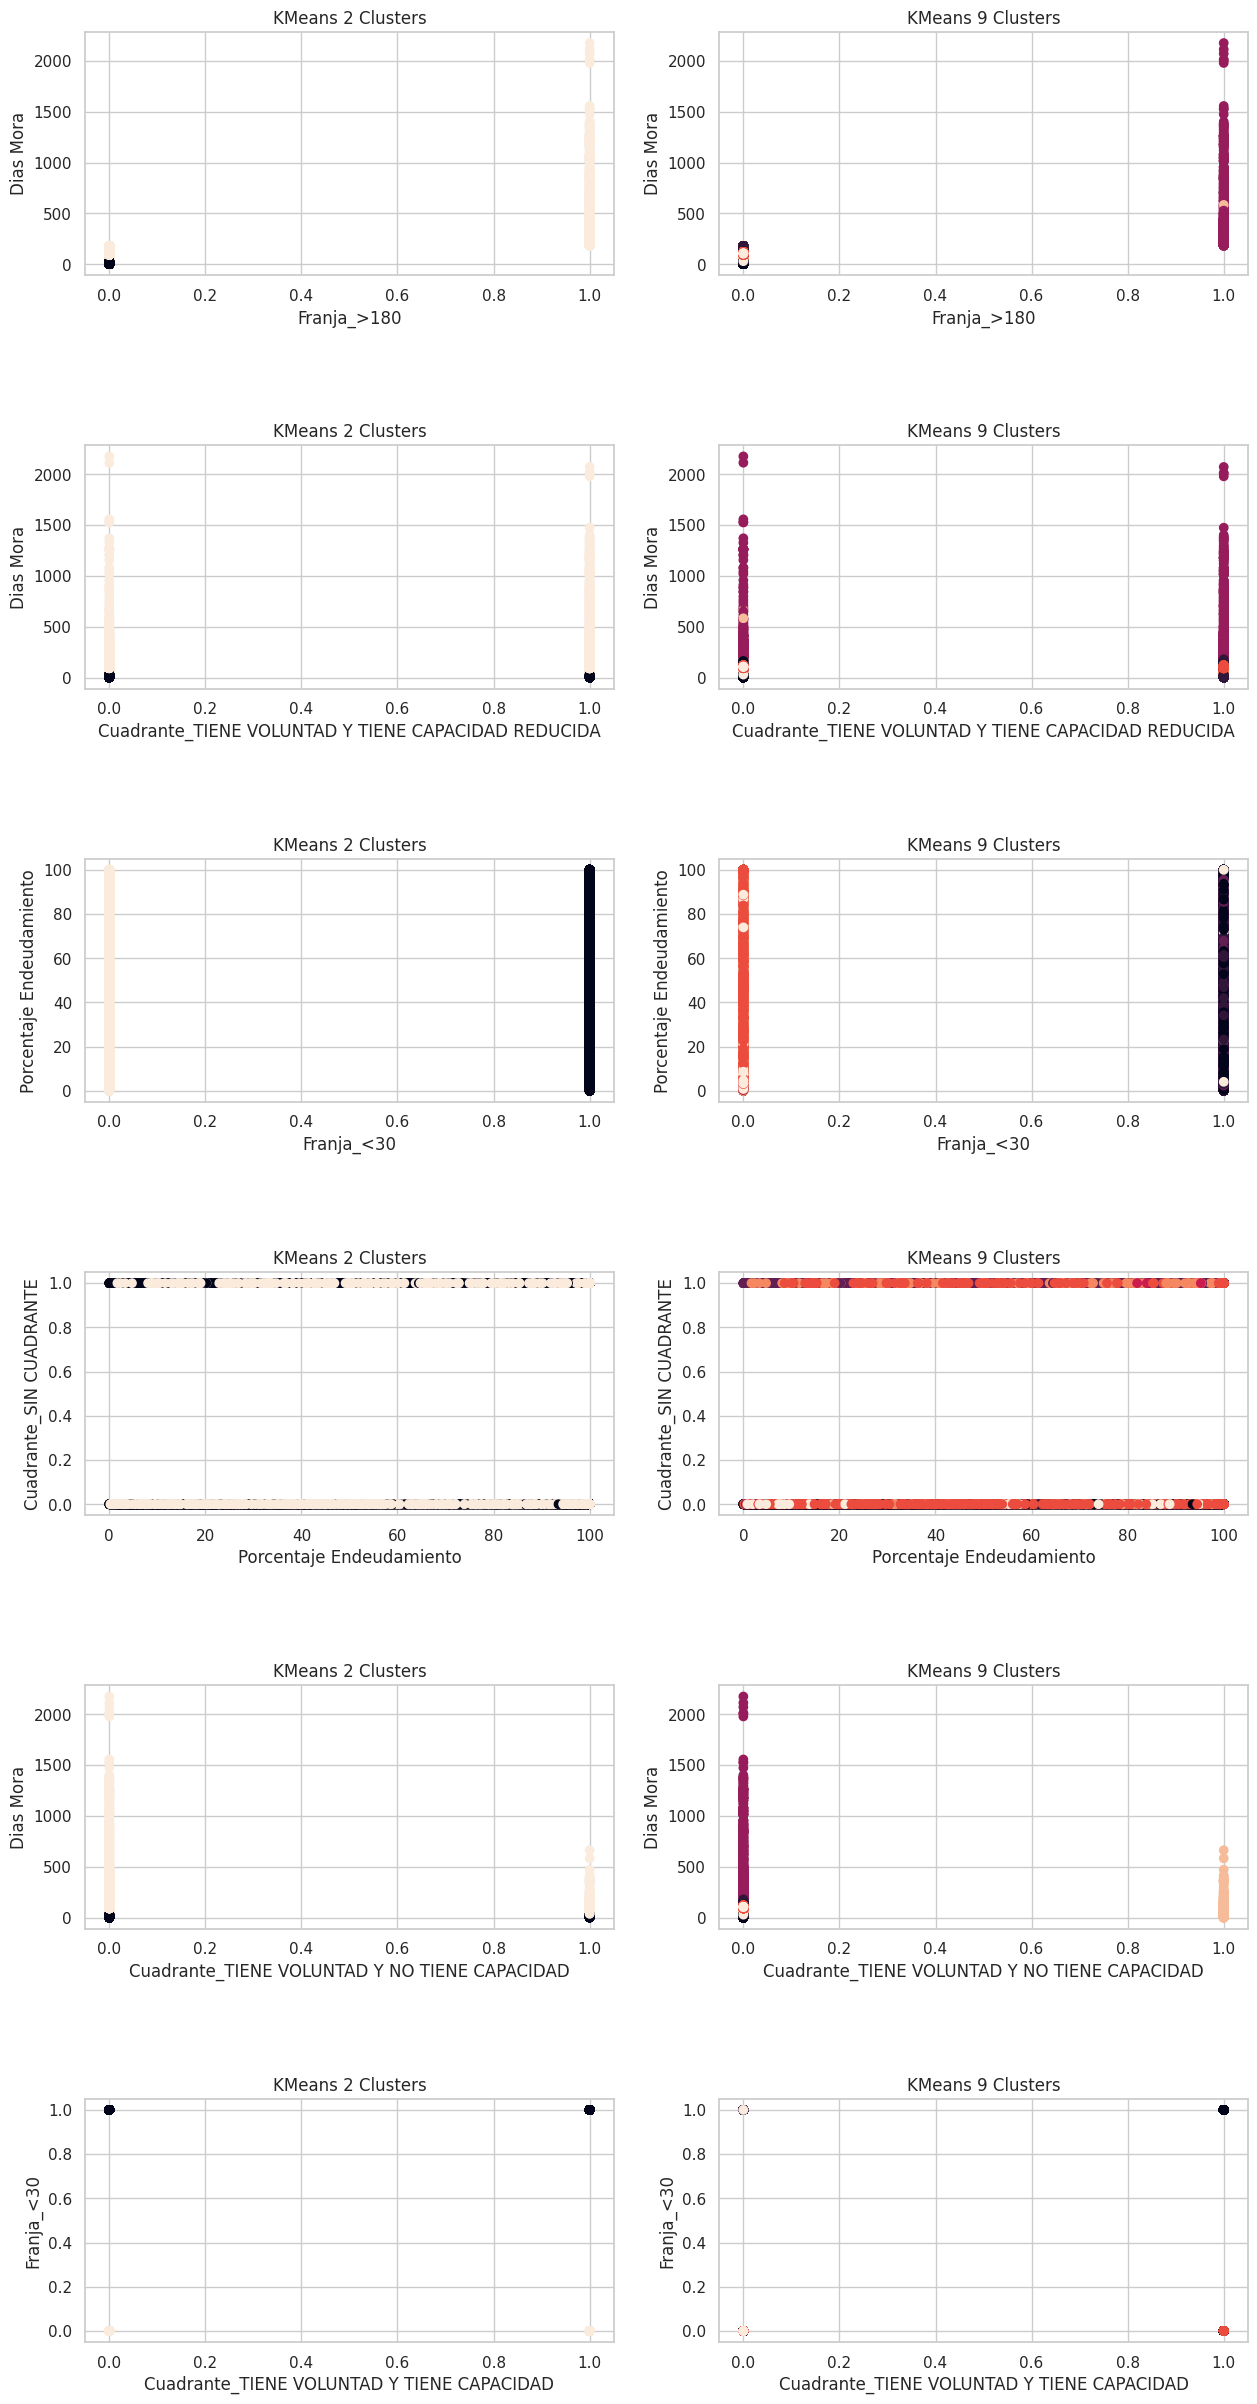

In [127]:
# Guardo las etiquetas de los clusters en el marco de datos
agrupamientos_cartera['cluster2'] = kmeans2.labels_
agrupamientos_cartera['cluster9'] = kmeans9.labels_

# Visualizo los clústeres
fig, axes = plt.subplots(6,2, figsize=(15,30))
# Ajusta los márgenes para agregar espacio entre filas y columnas
plt.subplots_adjust(wspace=0.2, hspace=0.7)
axes[0,0].scatter(agrupamientos_cartera['Franja_>180'], agrupamientos_cartera['Dias Mora'], c = agrupamientos_cartera['cluster2'])
axes[0,0].set_xlabel('Franja_>180')
axes[0,0].set_ylabel('Dias Mora')
axes[0,0].set_title('KMeans 2 Clusters')
axes[0,1].scatter(agrupamientos_cartera['Franja_>180'], agrupamientos_cartera['Dias Mora'], c = agrupamientos_cartera['cluster9'])
axes[0,1].set_xlabel('Franja_>180')
axes[0,1].set_ylabel('Dias Mora')
axes[0,1].set_title('KMeans 9 Clusters')

axes[1,0].scatter(agrupamientos_cartera['Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA'], agrupamientos_cartera['Dias Mora'], c = agrupamientos_cartera['cluster2'])
axes[1,0].set_xlabel('Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA')
axes[1,0].set_ylabel('Dias Mora')
axes[1,0].set_title('KMeans 2 Clusters')
axes[1,1].scatter(agrupamientos_cartera['Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA'], agrupamientos_cartera['Dias Mora'], c = agrupamientos_cartera['cluster9'])
axes[1,1].set_xlabel('Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA')
axes[1,1].set_ylabel('Dias Mora')
axes[1,1].set_title('KMeans 9 Clusters')

axes[2,0].scatter(agrupamientos_cartera['Franja_<30'], agrupamientos_cartera['Porcentaje Endeudamiento'], c = agrupamientos_cartera['cluster2'])
axes[2,0].set_xlabel('Franja_<30')
axes[2,0].set_ylabel('Porcentaje Endeudamiento')
axes[2,0].set_title('KMeans 2 Clusters')
axes[2,1].scatter(agrupamientos_cartera['Franja_<30'], agrupamientos_cartera['Porcentaje Endeudamiento'], c = agrupamientos_cartera['cluster9'])
axes[2,1].set_xlabel('Franja_<30')
axes[2,1].set_ylabel('Porcentaje Endeudamiento')
axes[2,1].set_title('KMeans 9 Clusters')

axes[3,0].scatter(agrupamientos_cartera['Porcentaje Endeudamiento'], agrupamientos_cartera['Cuadrante_SIN CUADRANTE'], c = agrupamientos_cartera['cluster2'])
axes[3,0].set_xlabel('Porcentaje Endeudamiento')
axes[3,0].set_ylabel('Cuadrante_SIN CUADRANTE')
axes[3,0].set_title('KMeans 2 Clusters')
axes[3,1].scatter(agrupamientos_cartera['Porcentaje Endeudamiento'], agrupamientos_cartera['Cuadrante_SIN CUADRANTE'], c = agrupamientos_cartera['cluster9'])
axes[3,1].set_xlabel('Porcentaje Endeudamiento')
axes[3,1].set_ylabel('Cuadrante_SIN CUADRANTE')
axes[3,1].set_title('KMeans 9 Clusters')

axes[4,0].scatter(agrupamientos_cartera['Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD'], agrupamientos_cartera['Dias Mora'], c = agrupamientos_cartera['cluster2'])
axes[4,0].set_xlabel('Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD')
axes[4,0].set_ylabel('Dias Mora')
axes[4,0].set_title('KMeans 2 Clusters')
axes[4,1].scatter(agrupamientos_cartera['Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD'], agrupamientos_cartera['Dias Mora'], c = agrupamientos_cartera['cluster9'])
axes[4,1].set_xlabel('Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD')
axes[4,1].set_ylabel('Dias Mora')
axes[4,1].set_title('KMeans 9 Clusters')

axes[5,0].scatter(agrupamientos_cartera['Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD'], agrupamientos_cartera['Franja_<30'], c = agrupamientos_cartera['cluster2'])
axes[5,0].set_xlabel('Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD')
axes[5,0].set_ylabel('Franja_<30')
axes[5,0].set_title('KMeans 2 Clusters')
axes[5,1].scatter(agrupamientos_cartera['Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD'], agrupamientos_cartera['Franja_<30'], c = agrupamientos_cartera['cluster9'])
axes[5,1].set_xlabel('Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD')
axes[5,1].set_ylabel('Franja_<30')
axes[5,1].set_title('KMeans 9 Clusters')

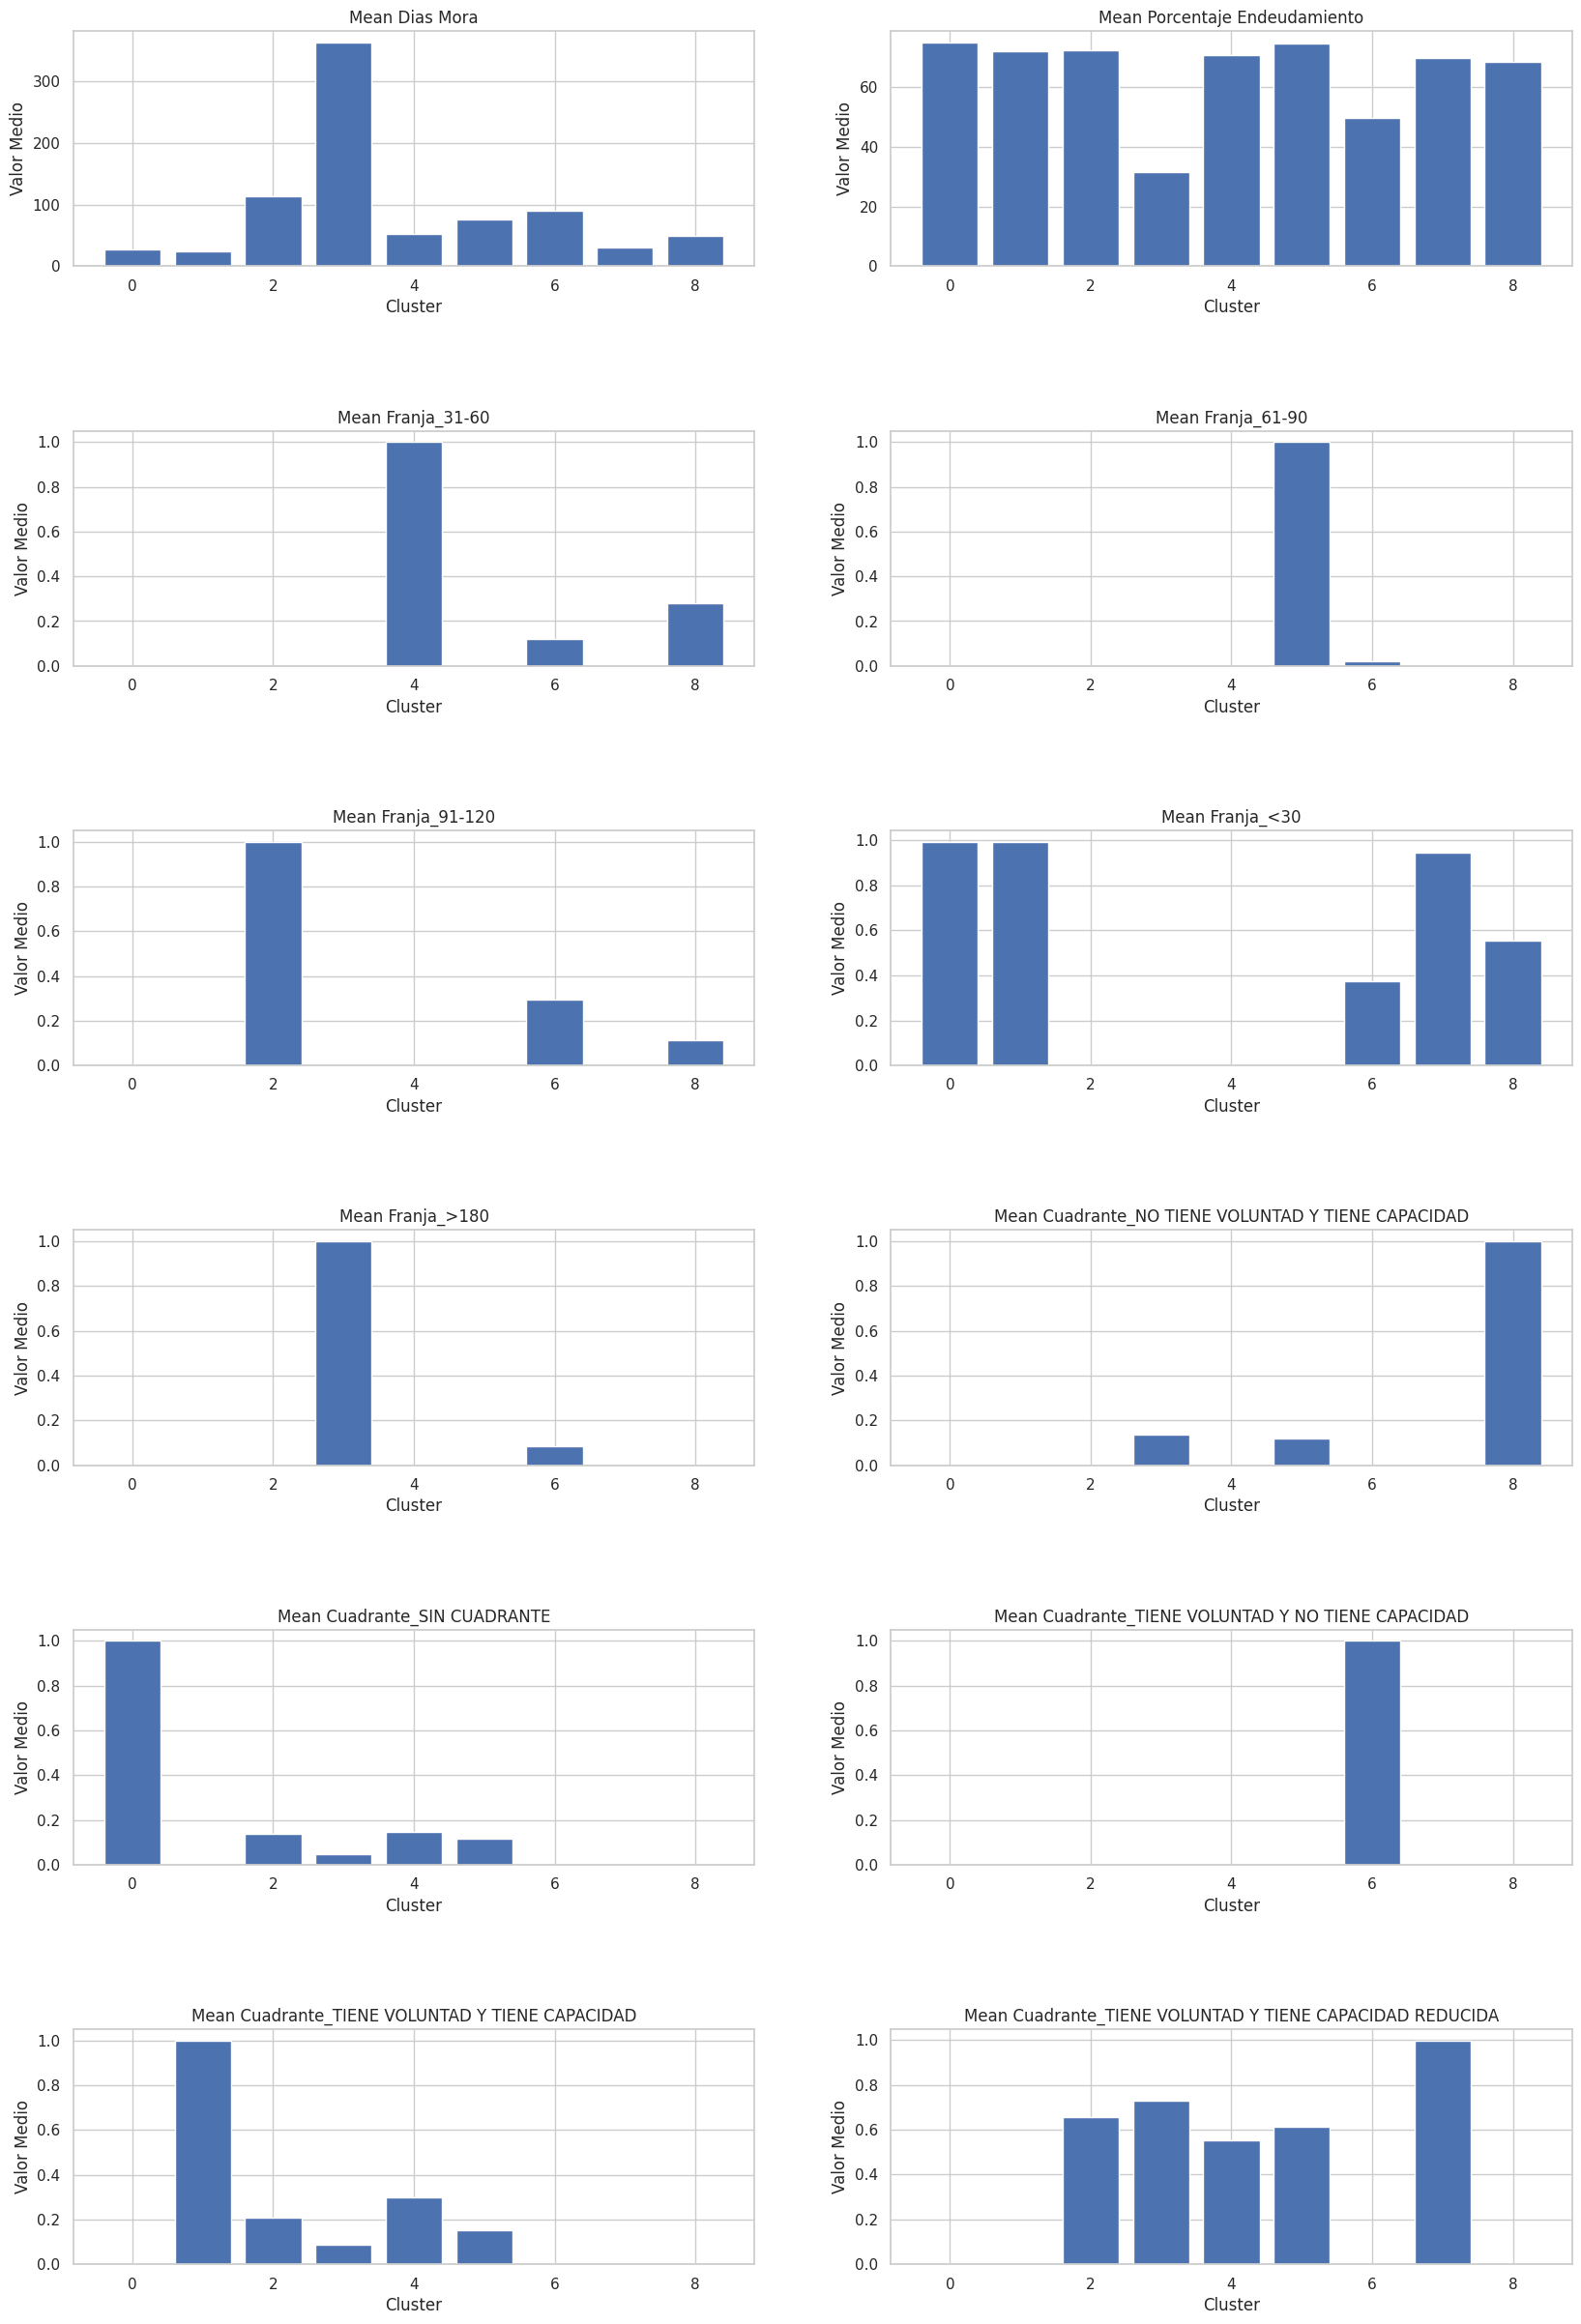

In [125]:
# Visualizar medios
fig, axes = plt.subplots(6, 2, figsize=(20, 30))

# Ajusta los márgenes para agregar espacio entre filas y columnas
plt.subplots_adjust(wspace=0.2, hspace=0.7)

# fig representa un array de dimensiones 3, 4. axes.ravel() lo aplanará a 12, 1
axes = axes.ravel()

# Se crea un bucle sobre las columnas y trace cada una en una figura separada, que omita la columna 'cluster'.
for i, col in enumerate(cluster_groups.columns[1:]):
    ax = axes[i]
    ax.bar(cluster_groups['cluster'], cluster_groups[col])
    ax.set_title(f'Mean {col}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valor Medio')
